In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

First we define the logistic function for the logistic regression which is 
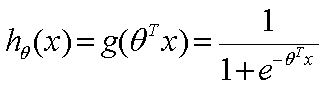

where 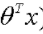 is defined as mx+b where m and b are weights and bias.

This function is also known as sigmoid function which returns the values between 0 and 1.

In [483]:
#first we define for mx+c which is a line
def hypline(m,X,b):
  return np.dot(m, X.T)+ b


In [484]:
#Now we define the logistic hypothesis function
def regfunc(m,X,b):
  hyp=hypline(m,X,b)
  return 1/(1+np.exp(-(hyp)))

The log likelihood for the maximising of a logistic function is

     = ylog(h(x))+(1-y)log(1-h(x))

Derivative of this we would get the cross entropy loss function which is

    = -(y log(h(x) + (1-y) log(1-h(x)))

where y is the actual value and h(x) is the predicted value.

In [485]:
def hyploss(m,X,b,Y):
  r=regfunc(m,X,b)
  p=0.0099 #when predicted value r is 0, then the log(0) tends to become undefined, so to avoid that, we added a small value p (So that it never becomes 0).
  return np.mean(-(Y*np.log(r+p)+(1-Y)*np.log(1-r+p)))

In [486]:
def grad_m(m,X,b,Y):
  k=regfunc(m,X,b)
  return np.mean((k-Y).T*X, axis=0)

In [487]:
def grad_b(m,X,b,Y):
  k=regfunc(m,X,b)
  return np.mean(k-Y)

In [488]:
def accuracy(m,X,b,Y):
  Y_pred=regfunc(m,X,b)
  Y_pred[Y_pred>=0.5]=1
  Y_pred[Y_pred<0.5]=0
  for i in range(len(X)):
    plt.scatter(X[i][1],Y[i],color='red')
    plt.scatter(X[i][1],Y_pred[0][i],color='blue')
  
  plt.show()
  co=len(Y_pred[Y_pred==Y])
  return (co/len(Y.T))*100

In [489]:
def genderdata_minmax(gender_data):
    minmax = list()
    for i in range(len(gender_data[0])):
        col_values = [row[i] for row in gender_data]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

In [490]:
def normalize_gender_data(gender_data, minmax):
    for row in gender_data:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [491]:
def errorfunc(X,Y):
  error={}
  m=np.random.randn(1,X.shape[1])
  b=random.random()
  l=7
  for i in range(-3,4):
    m=m-l*grad_m(m,X,b,Y)
    b=b-l*grad_b(m,X,b,Y)
    error[i]=hyploss(m,X,b,Y)
  
  print(accuracy(m,X,b,Y))

  my_error=error.items()
  my_error=sorted(my_error)
  l,k =zip(*my_error)
  plt.plot(l,k)
  plt.show()

In [492]:
def preprocessing(gender_data):
  gender_data['Gender']=gender_data['Gender'].replace([' W  ',' M  '],[1,0])
  print(gender_data.head())
  gender_data.isnull().sum()
  print(gender_data.shape[0])
  h=(int)(gender_data.shape[0]*0.8)
  print(h)
  training_data = gender_data.iloc[:h]
  testing_data = gender_data.iloc[h:]


  X_train=training_data.drop(['Gender'], axis=1)
  Y_train=training_data['Gender']

  X_test=testing_data.drop(['Gender'], axis=1)
  Y_test=testing_data['Gender']

  print(X_train.dtypes)
  print(Y_train.dtypes)
  print(X_test.dtypes)
  print(Y_test.dtypes)

  X_train=X_train.astype('float64')
  Y_train=Y_train.astype('float64')
  X_test=X_test.astype('float64')
  Y_test=Y_test.astype('float64')

  X_train = np.asarray(X_train)
  Y_train = np.asarray(Y_train)
  X_test = np.asarray(X_test)
  Y_test = np.asarray(Y_test)

  X_train_min_max = X_train.copy()
  normalize_gender_data(X_train_min_max,genderdata_minmax(X_train_min_max))

  X_test_min_max = X_test.copy()
  normalize_gender_data(X_test_min_max,genderdata_minmax(X_test_min_max))

  print("Accuracy and Errorrate of the training data")
  errorfunc(X_train_min_max,Y_train)
  print("Accuracy and Errorrate of the testing data")
  errorfunc(X_test_min_max,Y_test)




In [493]:
gender_data=pd.read_csv("/Gender_data.csv")

In [494]:
gender_data.head()

Height     Weight  Age Gender
0  1.731660  73.919682   25    M  
1  1.540756  78.686701   24    W  
2  1.665596  88.076350   25    M  
3  1.755879  77.141752   22    W  
4  1.744801  85.143587   24    M

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
120
96
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


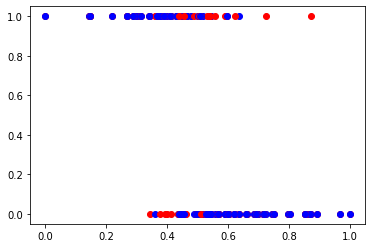

70.83333333333334


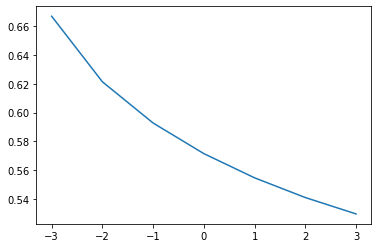

Accuracy and Errorrate of the testing data


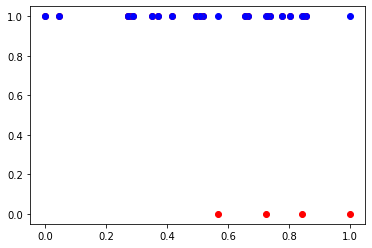

83.33333333333334


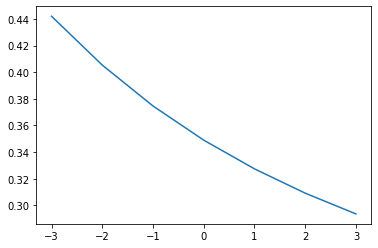

In [495]:
preprocessing(gender_data)

     Height     Weight  Age  Gender
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
5  1.655000  78.127225   23       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


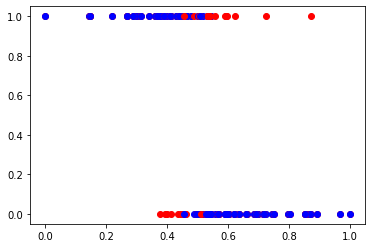

71.57894736842105


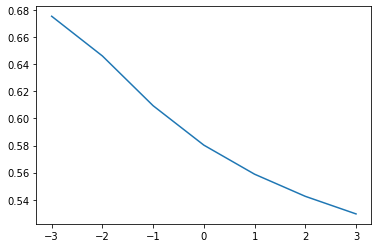

Accuracy and Errorrate of the testing data


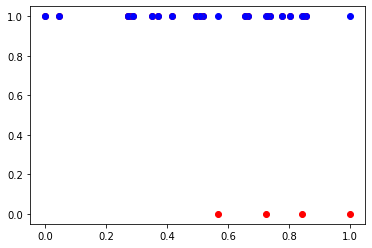

83.33333333333334


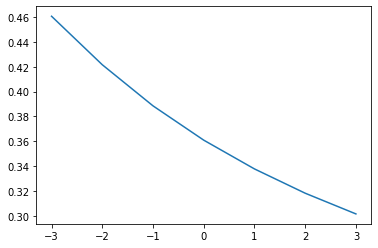

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
5  1.655000  78.127225   23       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


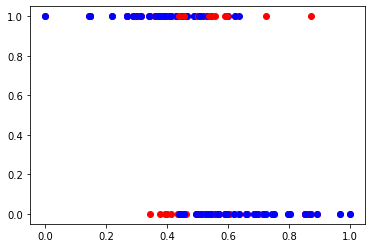

73.68421052631578


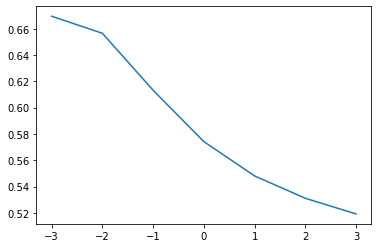

Accuracy and Errorrate of the testing data


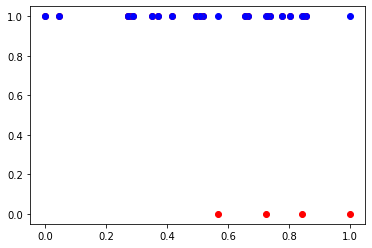

83.33333333333334


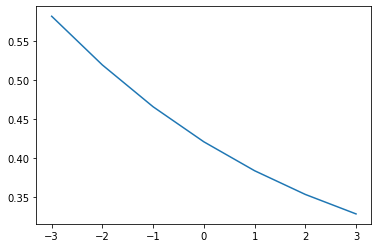

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
5  1.655000  78.127225   23       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


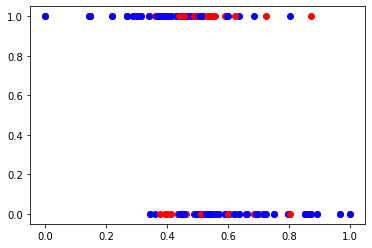

68.42105263157895


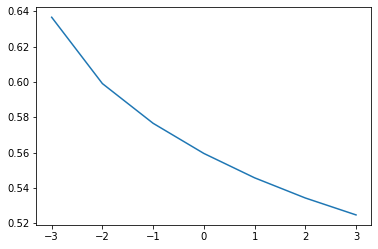

Accuracy and Errorrate of the testing data


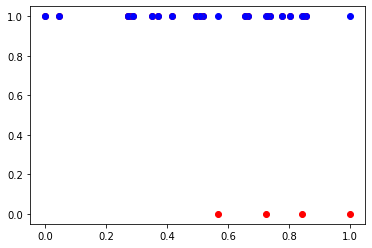

83.33333333333334


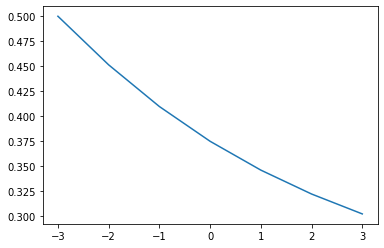

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
4  1.744801  85.143587   24       0
5  1.655000  78.127225   23       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


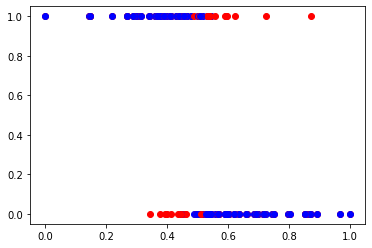

72.63157894736842


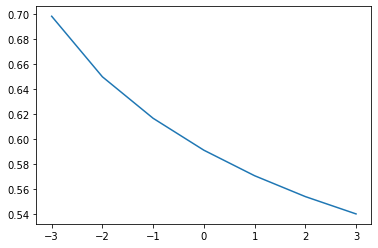

Accuracy and Errorrate of the testing data


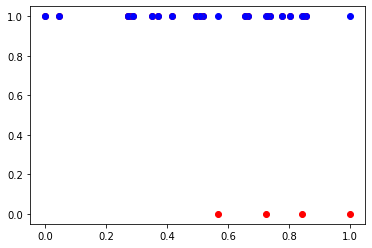

83.33333333333334


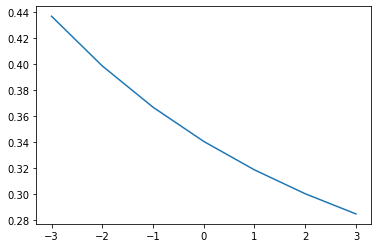

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
5  1.655000  78.127225   23       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


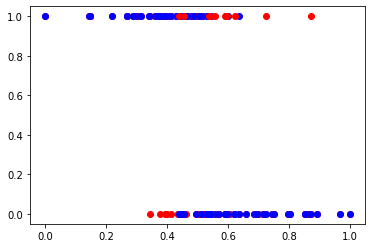

73.68421052631578


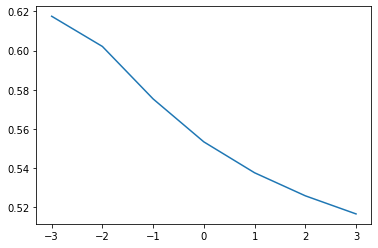

Accuracy and Errorrate of the testing data


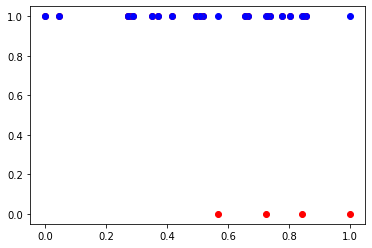

83.33333333333334


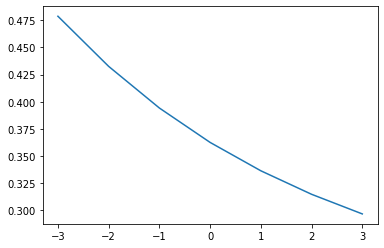

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


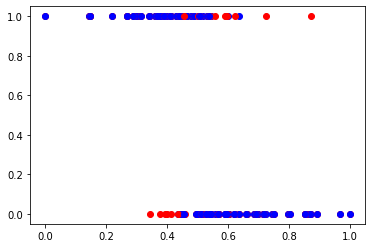

74.73684210526315


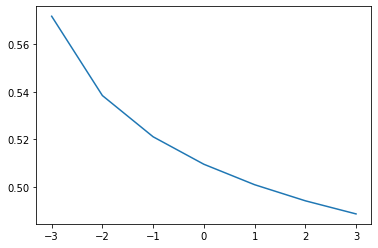

Accuracy and Errorrate of the testing data


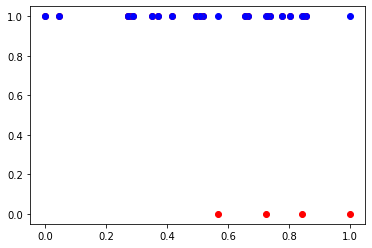

83.33333333333334


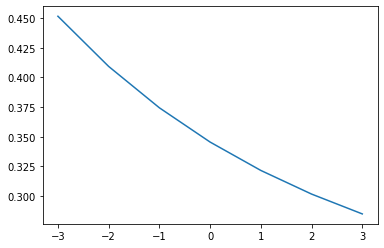

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


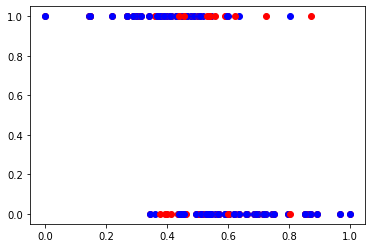

72.63157894736842


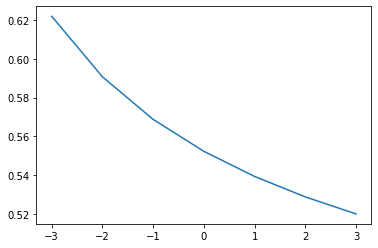

Accuracy and Errorrate of the testing data


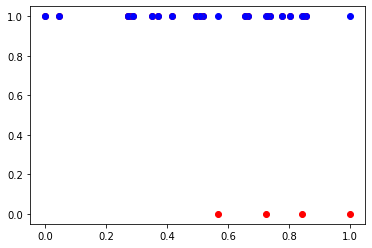

83.33333333333334


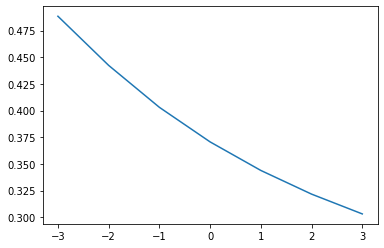

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


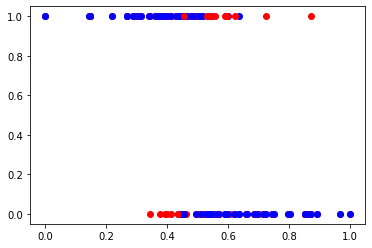

73.68421052631578


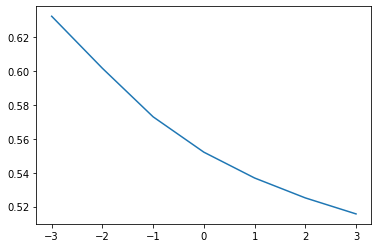

Accuracy and Errorrate of the testing data


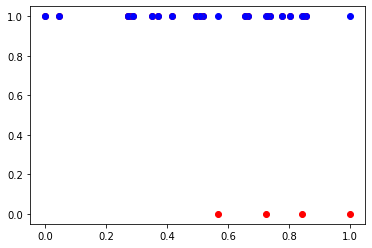

83.33333333333334


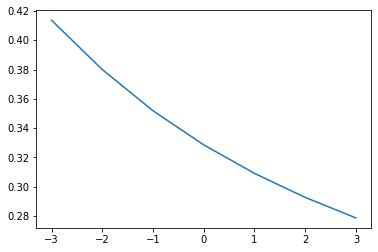

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


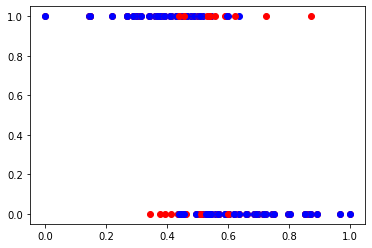

73.68421052631578


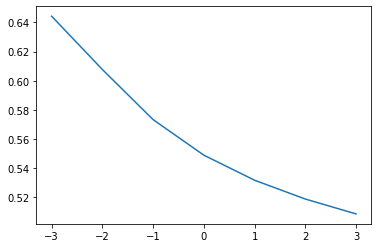

Accuracy and Errorrate of the testing data


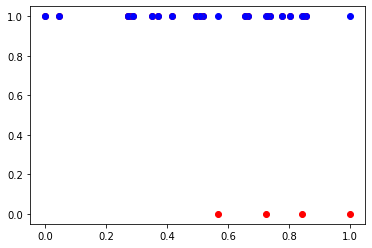

83.33333333333334


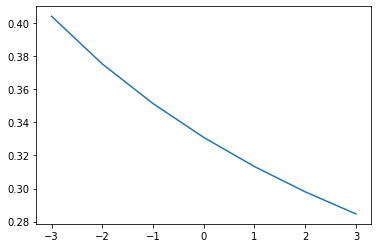

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


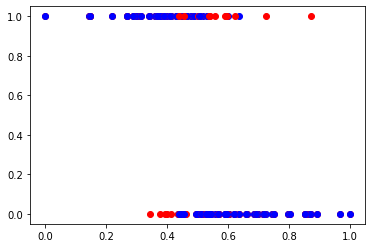

72.63157894736842


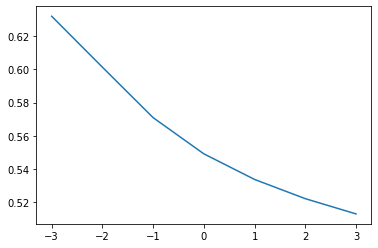

Accuracy and Errorrate of the testing data


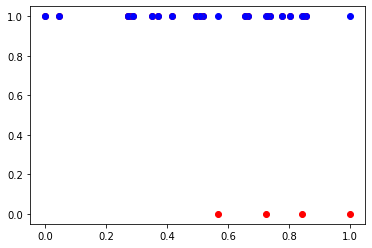

83.33333333333334


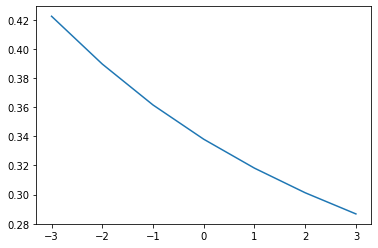

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


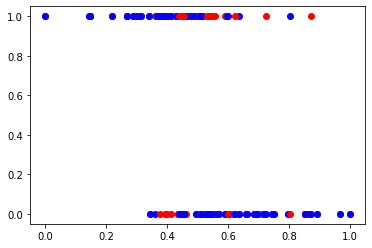

72.63157894736842


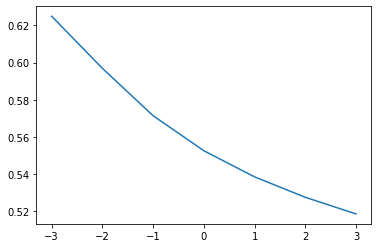

Accuracy and Errorrate of the testing data


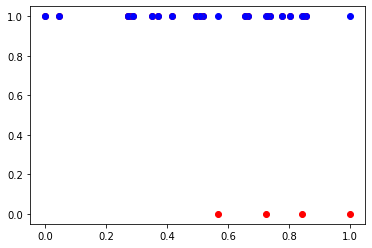

83.33333333333334


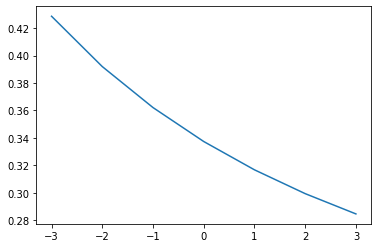

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


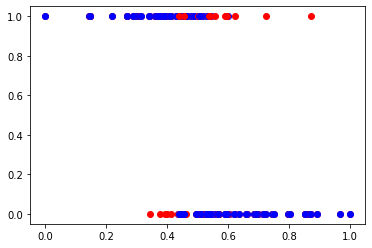

73.68421052631578


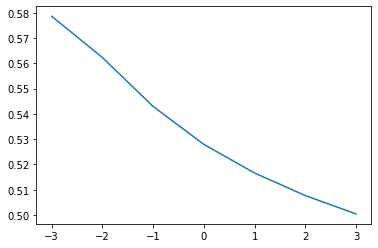

Accuracy and Errorrate of the testing data


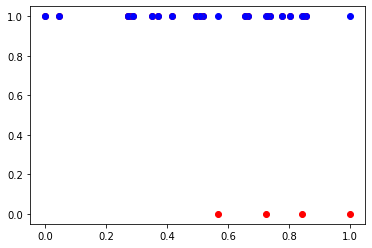

83.33333333333334


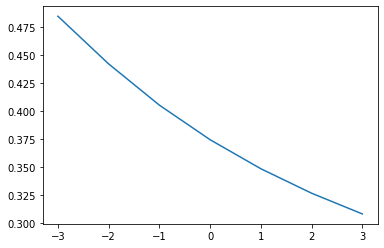

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


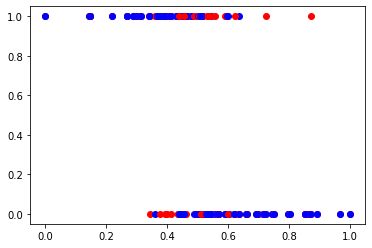

69.47368421052632


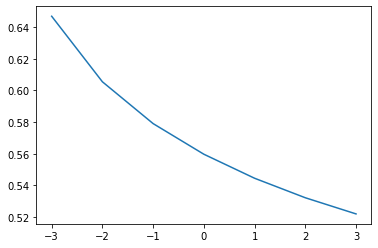

Accuracy and Errorrate of the testing data


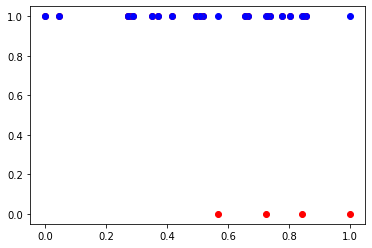

83.33333333333334


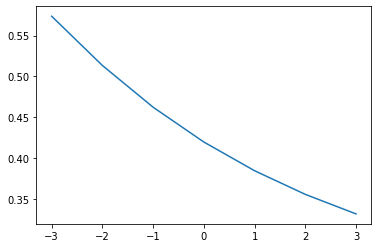

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


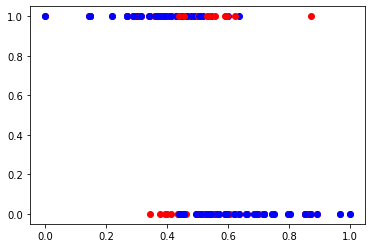

72.63157894736842


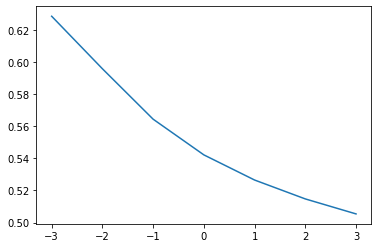

Accuracy and Errorrate of the testing data


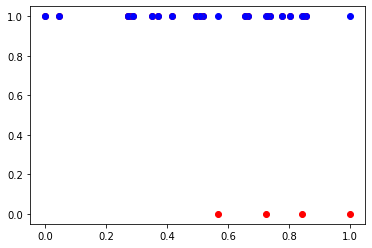

83.33333333333334


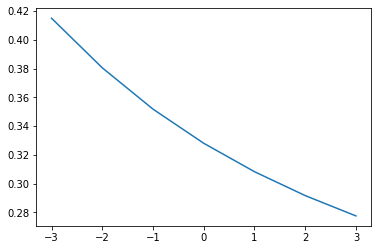

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


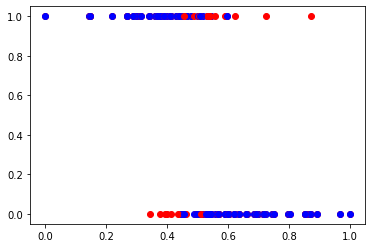

73.68421052631578


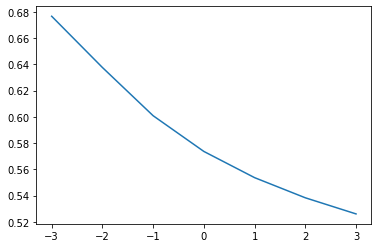

Accuracy and Errorrate of the testing data


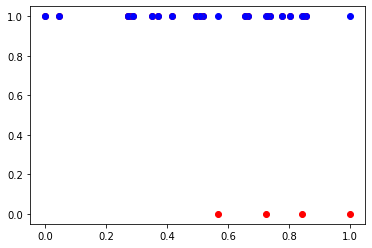

83.33333333333334


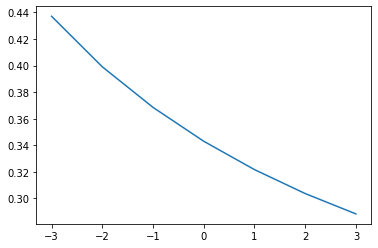

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


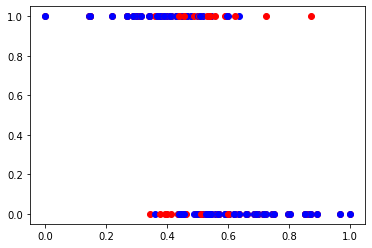

69.47368421052632


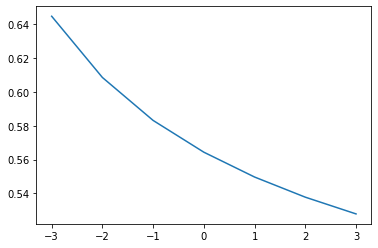

Accuracy and Errorrate of the testing data


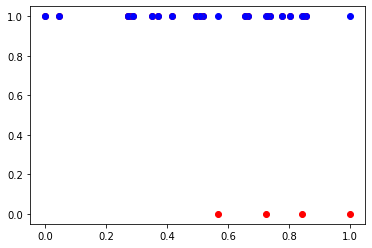

83.33333333333334


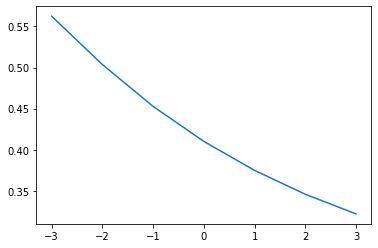

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


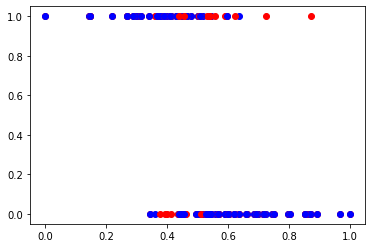

72.63157894736842


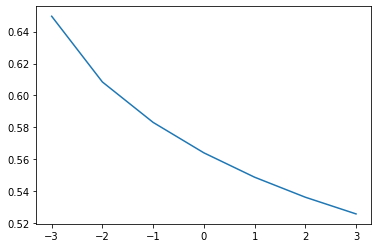

Accuracy and Errorrate of the testing data


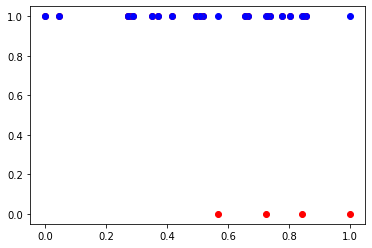

83.33333333333334


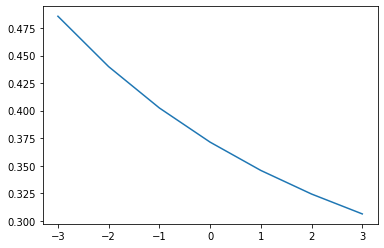

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


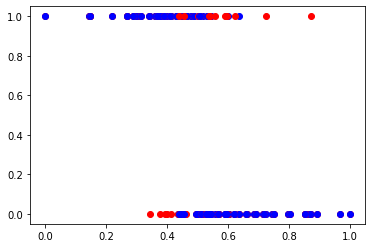

72.63157894736842


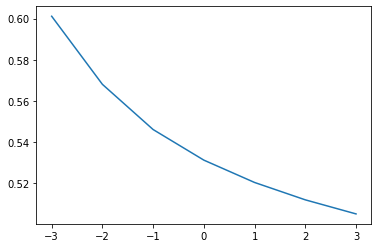

Accuracy and Errorrate of the testing data


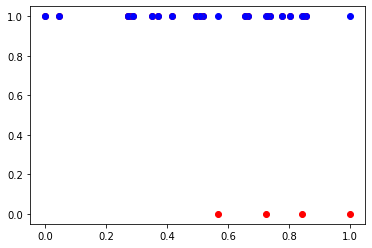

83.33333333333334


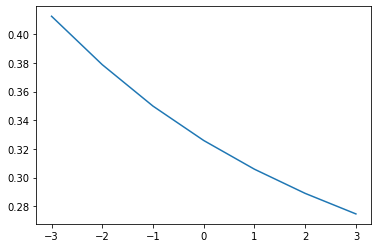

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


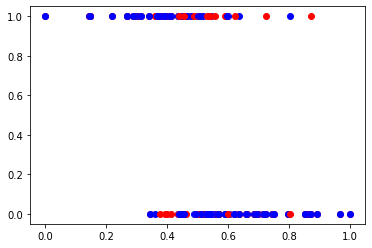

71.57894736842105


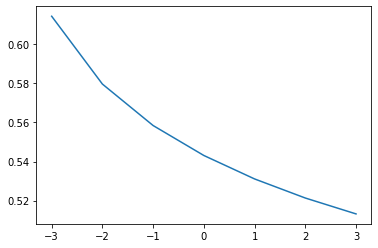

Accuracy and Errorrate of the testing data


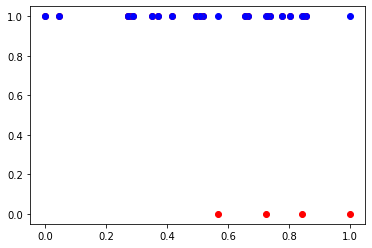

83.33333333333334


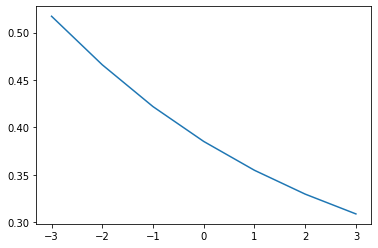

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


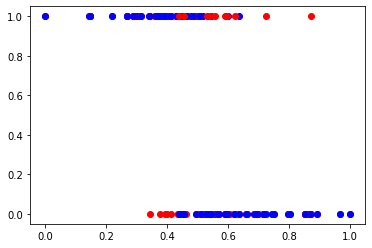

73.68421052631578


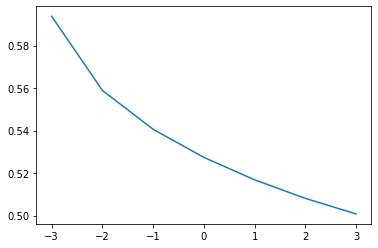

Accuracy and Errorrate of the testing data


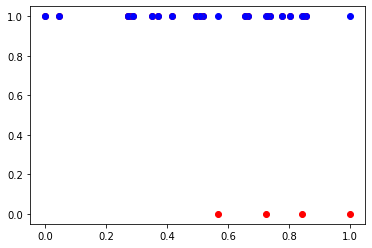

83.33333333333334


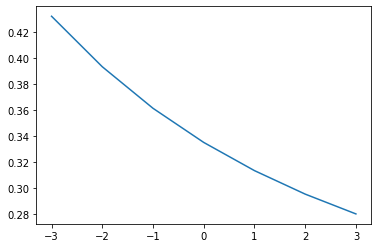

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


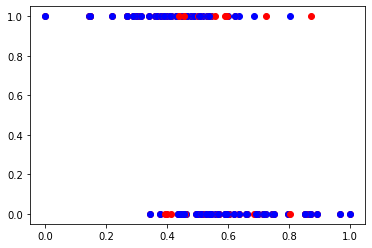

77.89473684210526


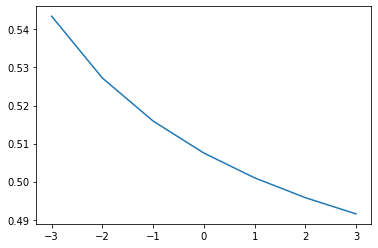

Accuracy and Errorrate of the testing data


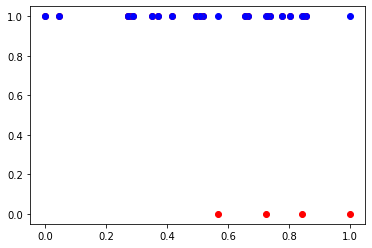

83.33333333333334


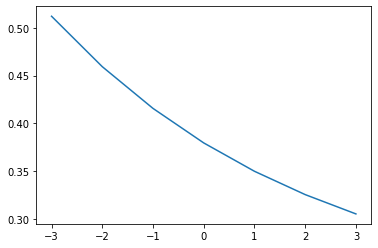

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


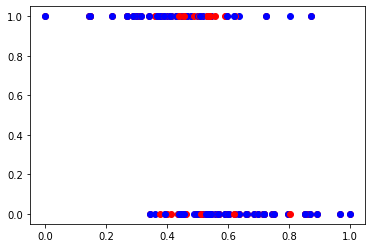

70.52631578947368


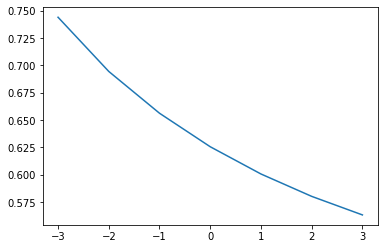

Accuracy and Errorrate of the testing data


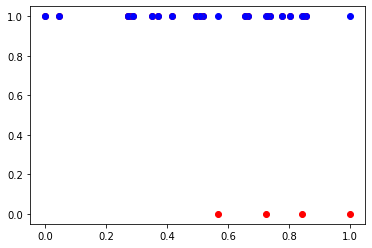

83.33333333333334


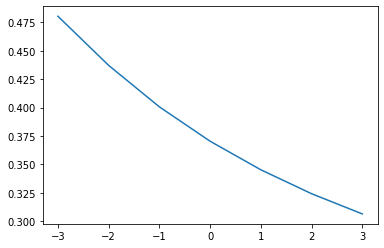

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


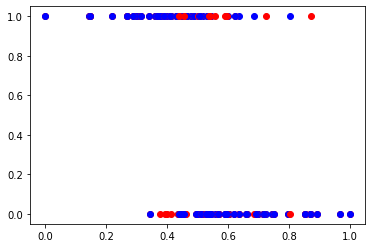

72.63157894736842


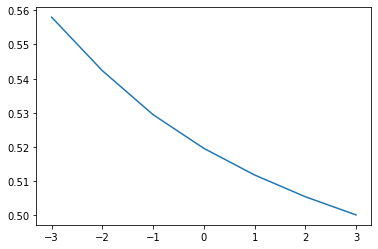

Accuracy and Errorrate of the testing data


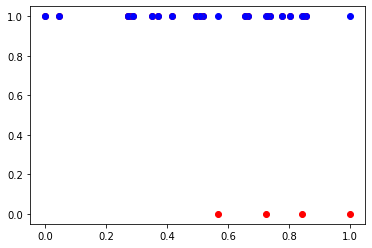

83.33333333333334


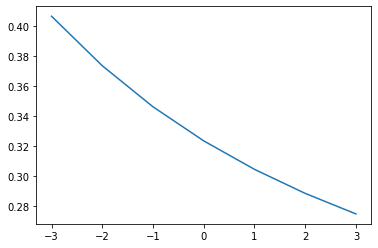

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


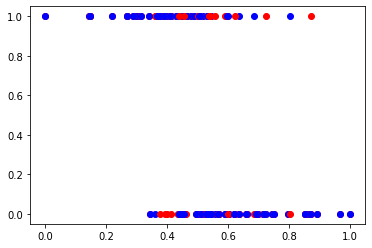

71.57894736842105


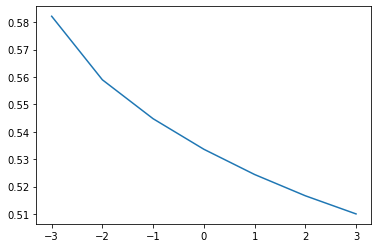

Accuracy and Errorrate of the testing data


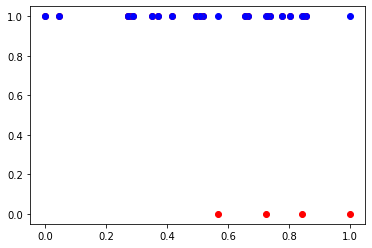

83.33333333333334


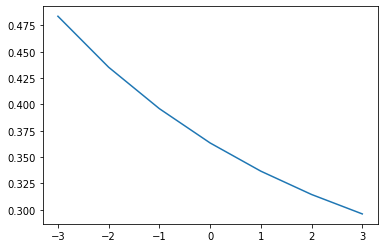

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


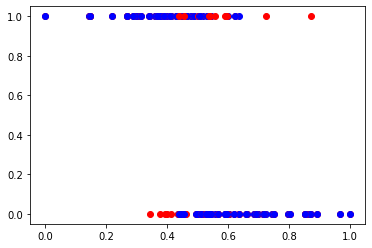

73.68421052631578


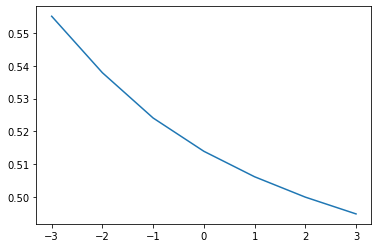

Accuracy and Errorrate of the testing data


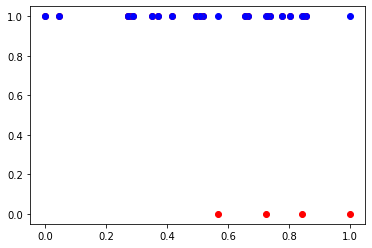

83.33333333333334


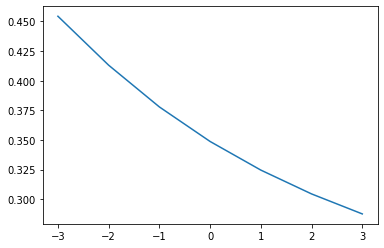

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


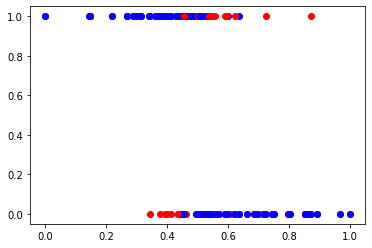

72.63157894736842


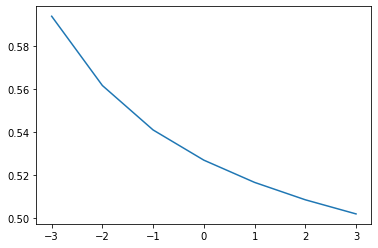

Accuracy and Errorrate of the testing data


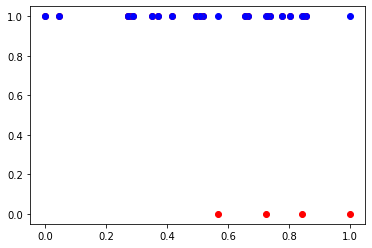

83.33333333333334


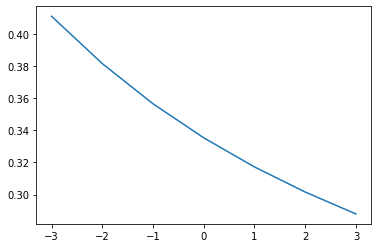

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


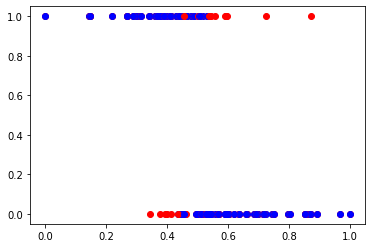

74.73684210526315


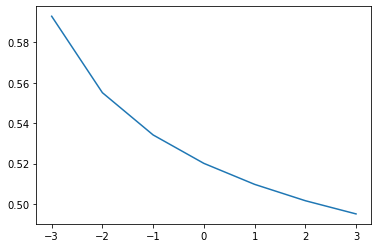

Accuracy and Errorrate of the testing data


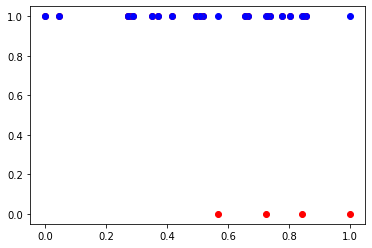

83.33333333333334


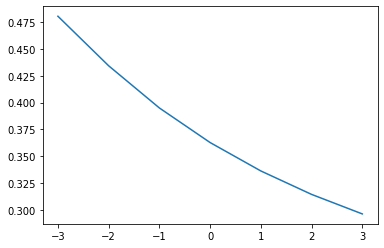

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


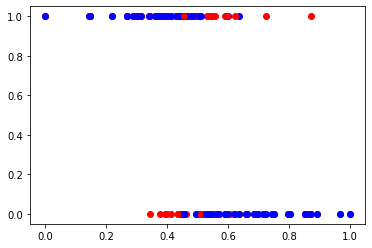

73.68421052631578


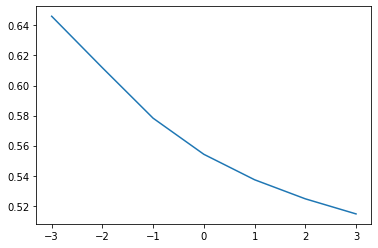

Accuracy and Errorrate of the testing data


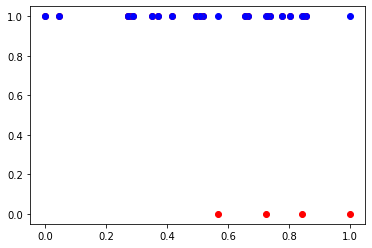

83.33333333333334


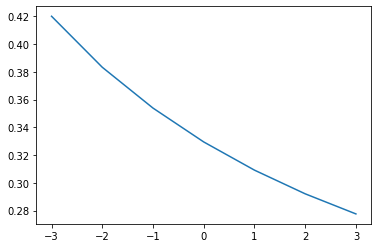

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


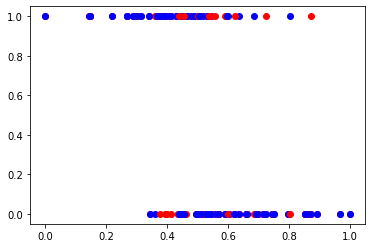

71.57894736842105


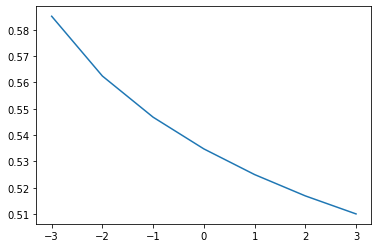

Accuracy and Errorrate of the testing data


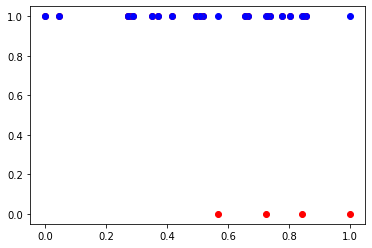

83.33333333333334


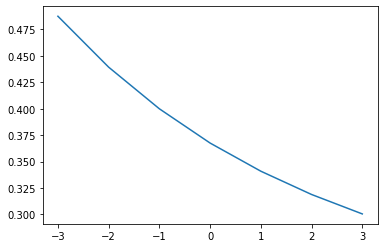

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


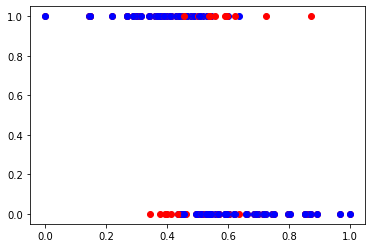

73.68421052631578


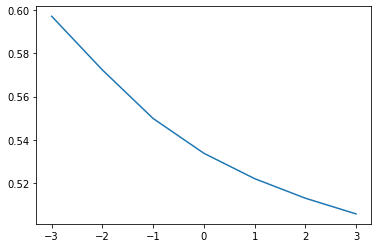

Accuracy and Errorrate of the testing data


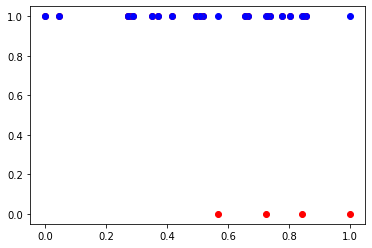

83.33333333333334


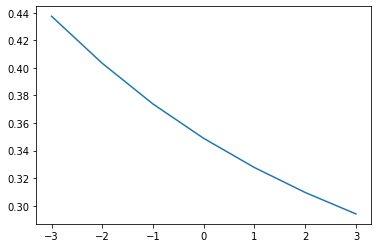

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


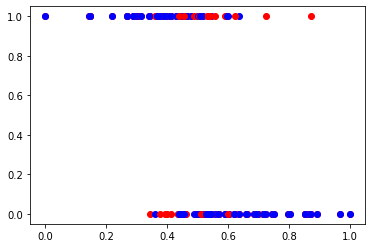

69.47368421052632


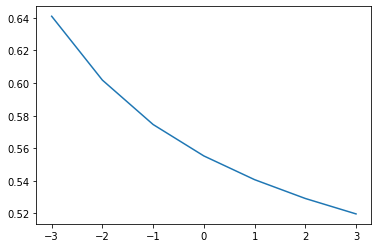

Accuracy and Errorrate of the testing data


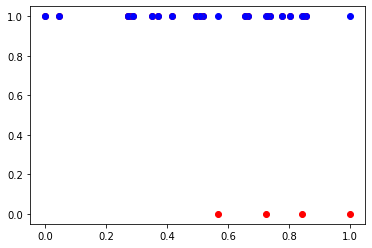

83.33333333333334


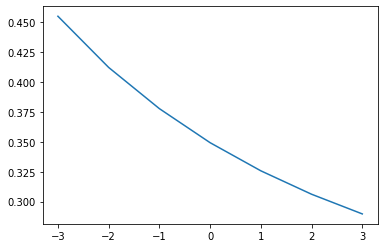

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


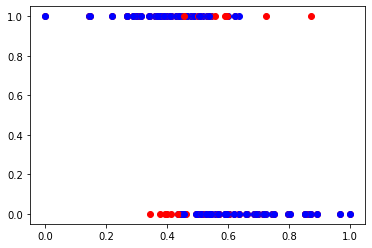

75.78947368421053


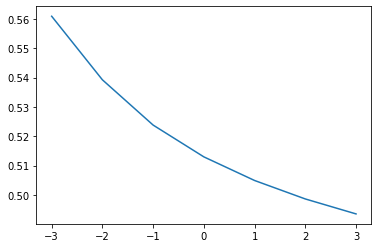

Accuracy and Errorrate of the testing data


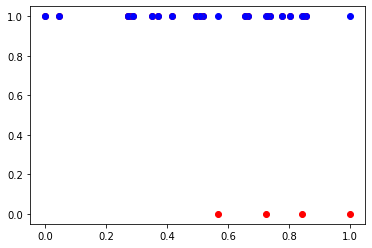

83.33333333333334


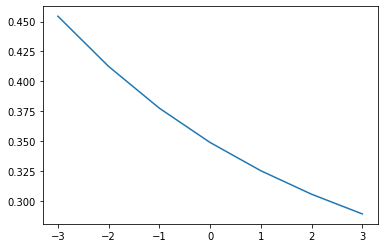

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


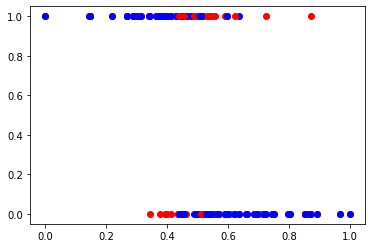

71.57894736842105


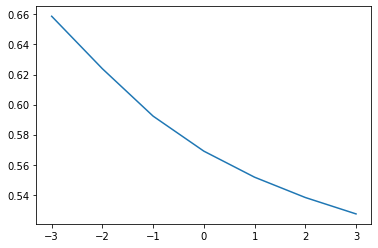

Accuracy and Errorrate of the testing data


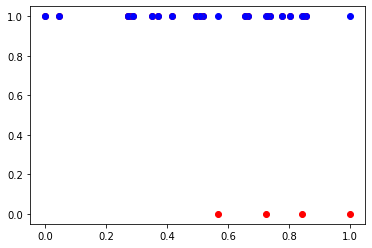

83.33333333333334


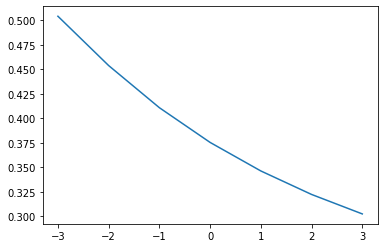

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


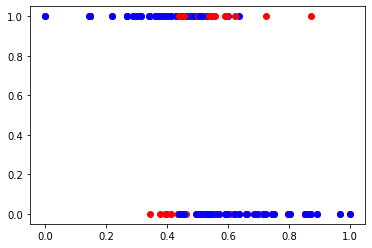

72.63157894736842


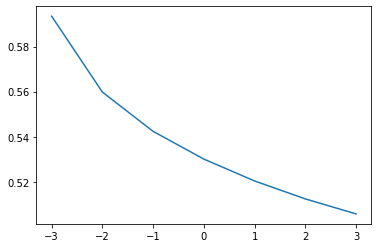

Accuracy and Errorrate of the testing data


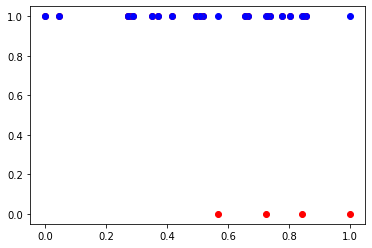

83.33333333333334


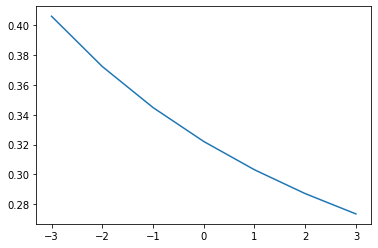

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


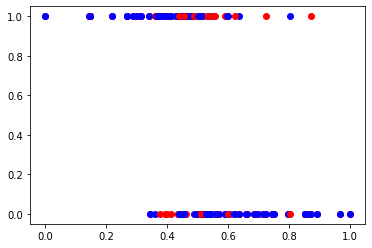

70.52631578947368


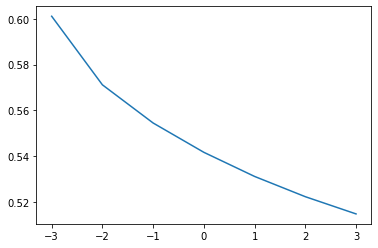

Accuracy and Errorrate of the testing data


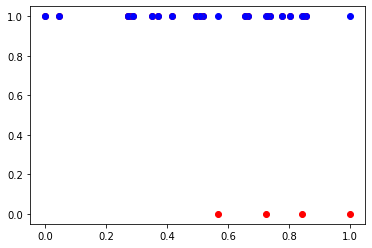

83.33333333333334


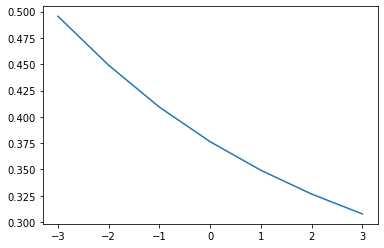

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


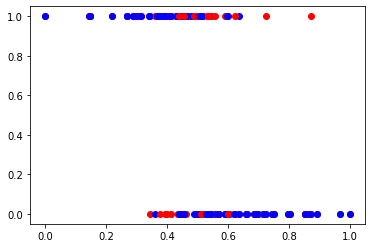

69.47368421052632


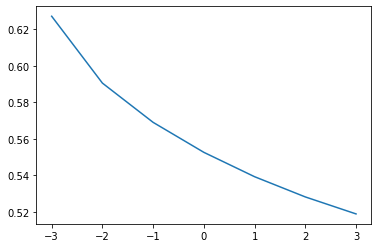

Accuracy and Errorrate of the testing data


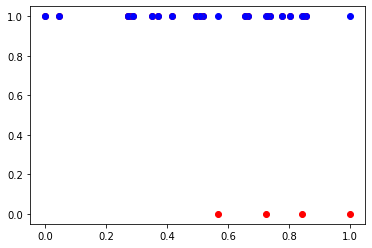

83.33333333333334


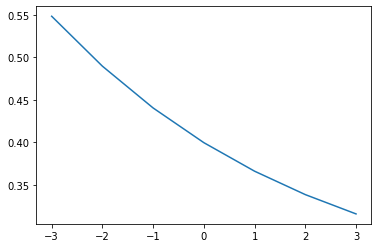

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


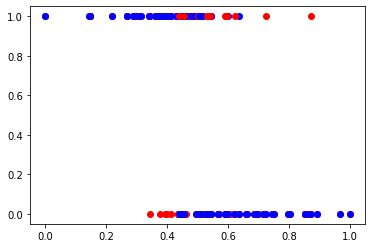

72.63157894736842


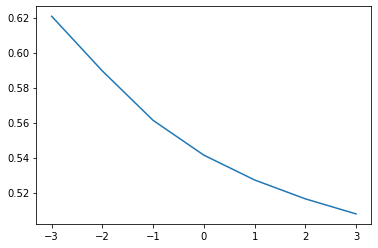

Accuracy and Errorrate of the testing data


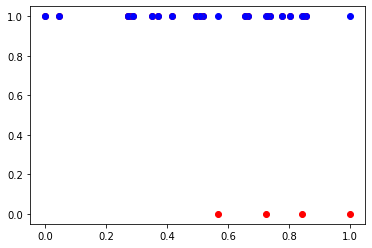

83.33333333333334


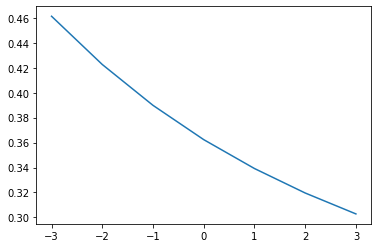

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


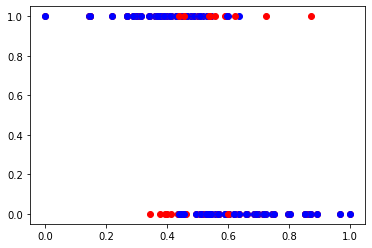

75.78947368421053


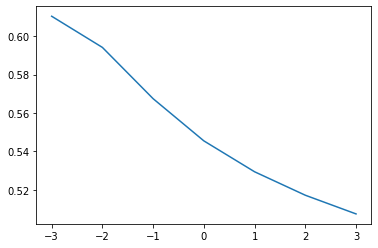

Accuracy and Errorrate of the testing data


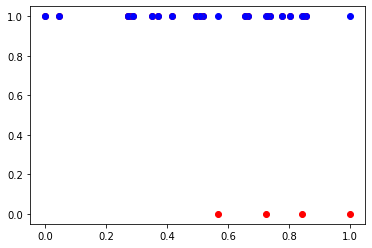

83.33333333333334


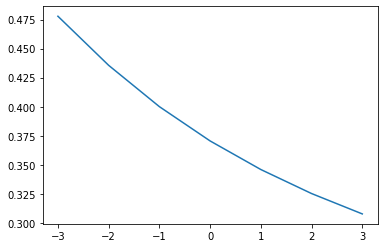

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


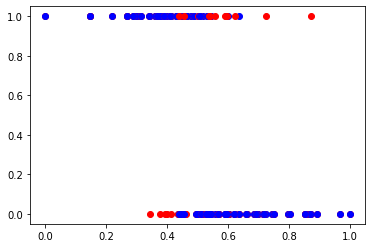

72.63157894736842


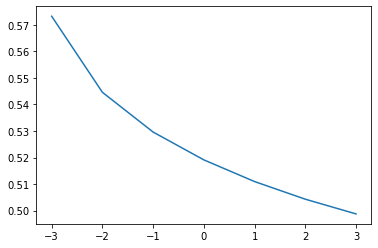

Accuracy and Errorrate of the testing data


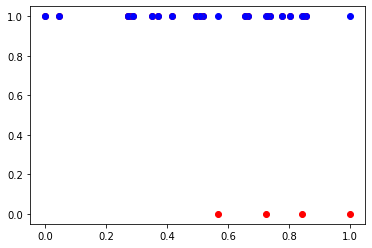

83.33333333333334


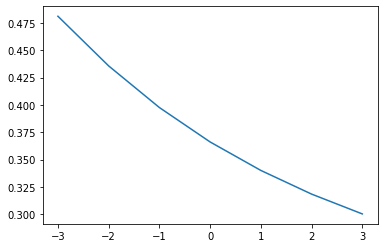

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


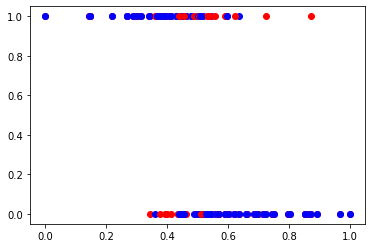

70.52631578947368


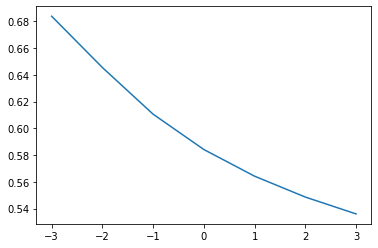

Accuracy and Errorrate of the testing data


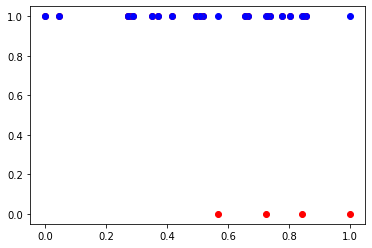

83.33333333333334


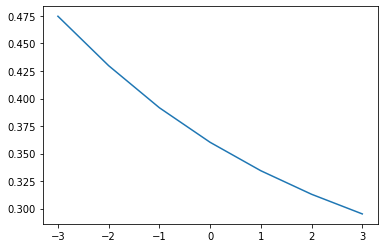

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


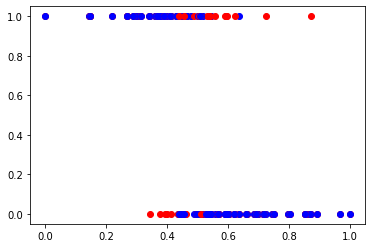

70.52631578947368


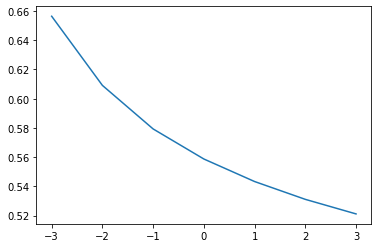

Accuracy and Errorrate of the testing data


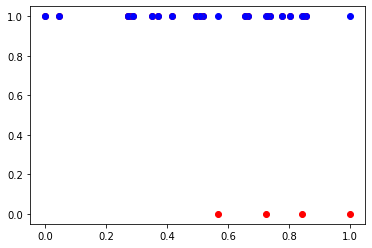

83.33333333333334


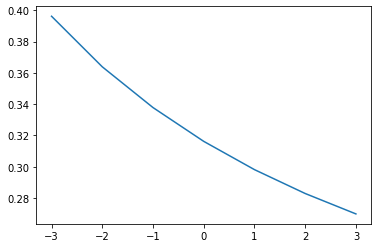

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


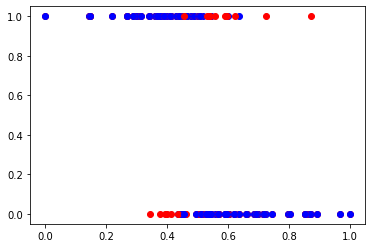

73.68421052631578


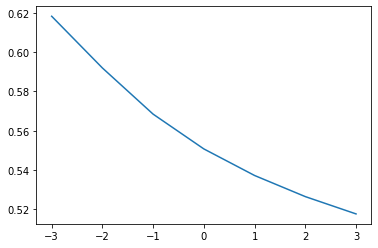

Accuracy and Errorrate of the testing data


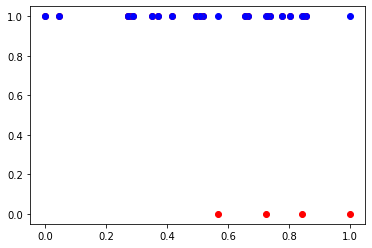

83.33333333333334


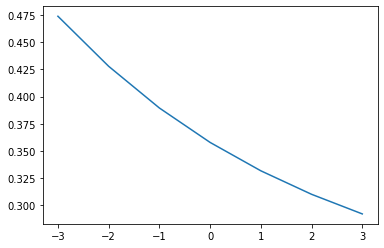

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


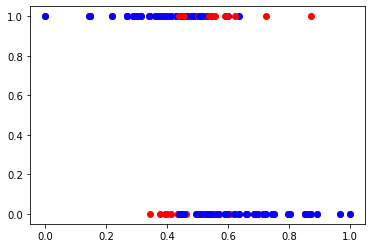

72.63157894736842


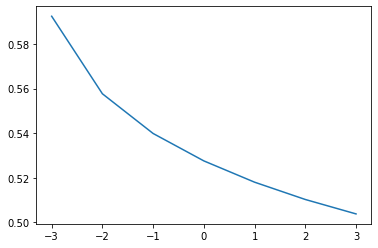

Accuracy and Errorrate of the testing data


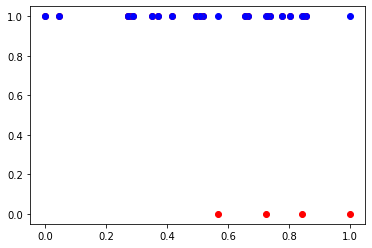

83.33333333333334


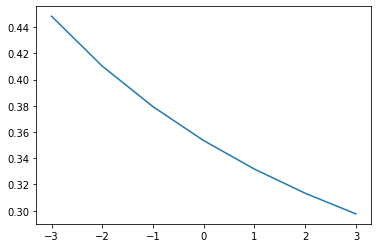

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


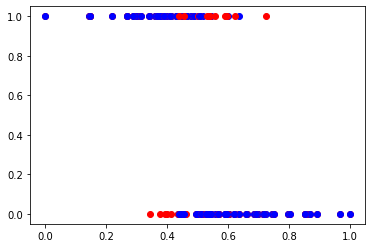

72.63157894736842


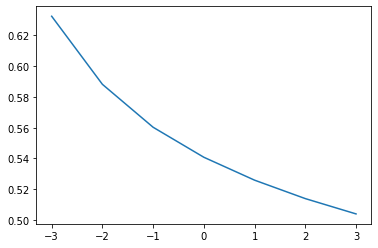

Accuracy and Errorrate of the testing data


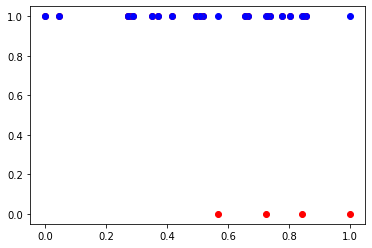

83.33333333333334


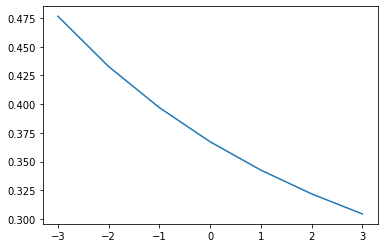

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


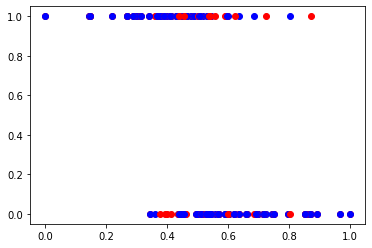

71.57894736842105


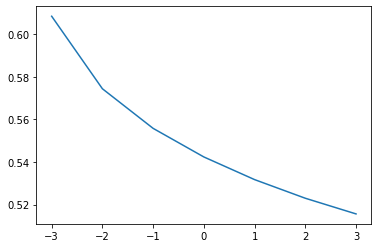

Accuracy and Errorrate of the testing data


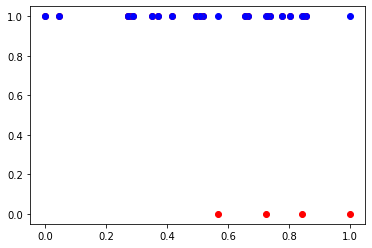

83.33333333333334


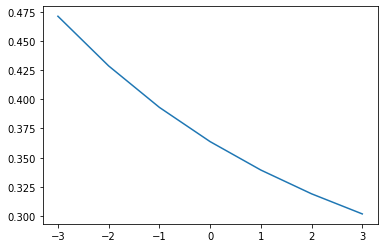

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


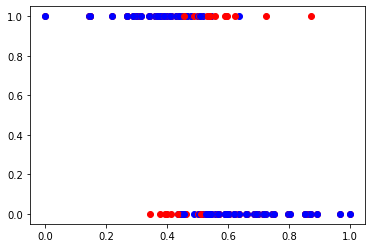

71.57894736842105


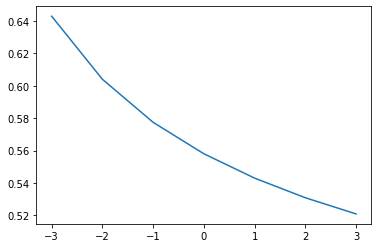

Accuracy and Errorrate of the testing data


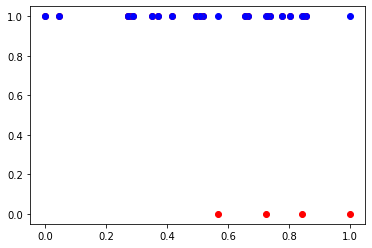

83.33333333333334


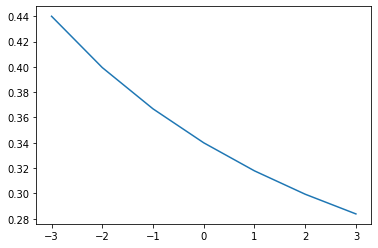

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


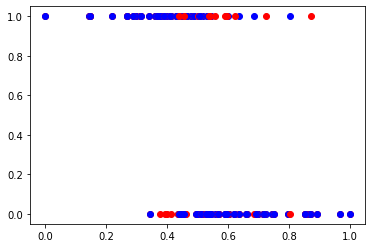

71.57894736842105


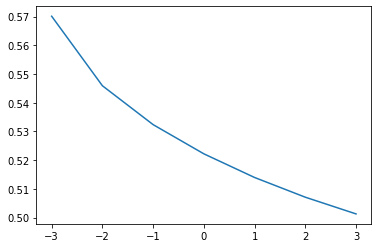

Accuracy and Errorrate of the testing data


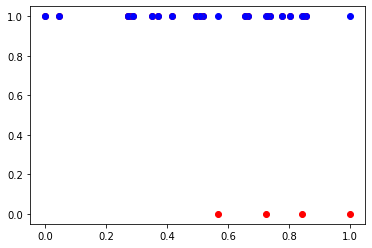

83.33333333333334


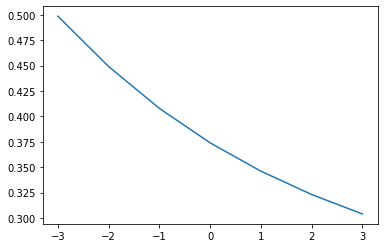

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


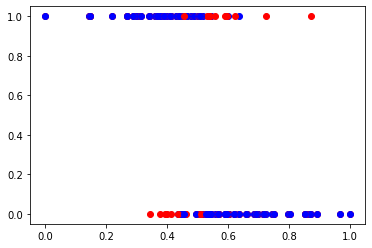

73.68421052631578


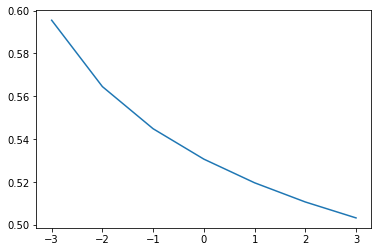

Accuracy and Errorrate of the testing data


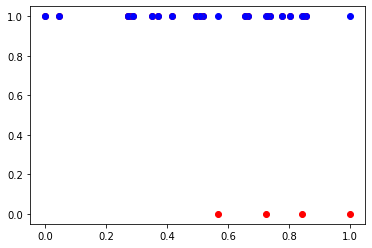

83.33333333333334


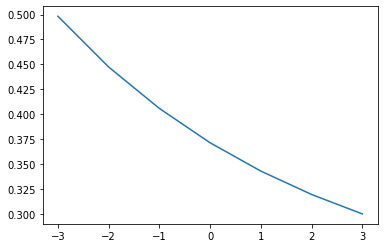

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


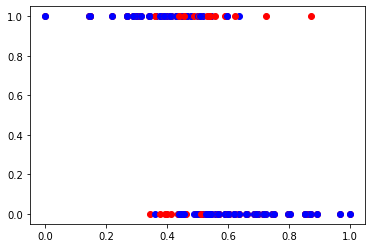

70.52631578947368


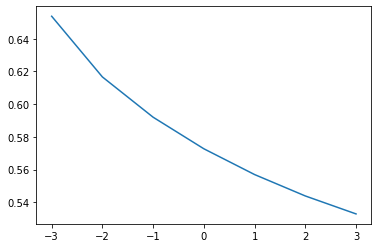

Accuracy and Errorrate of the testing data


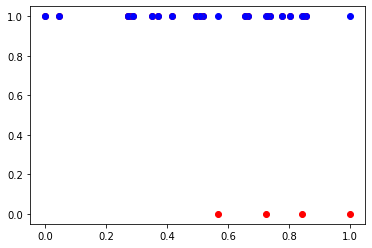

83.33333333333334


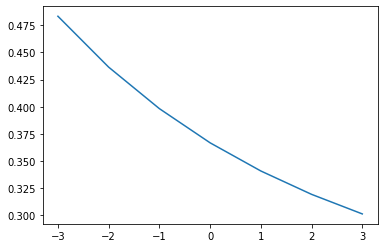

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


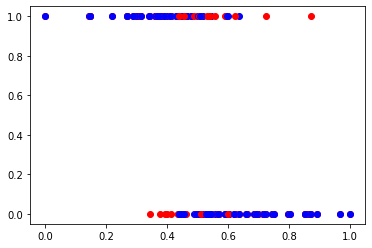

70.52631578947368


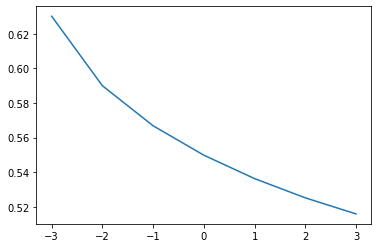

Accuracy and Errorrate of the testing data


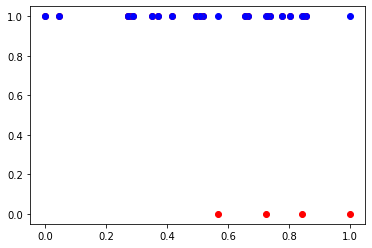

83.33333333333334


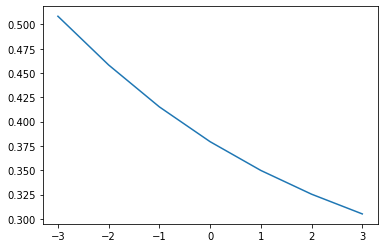

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


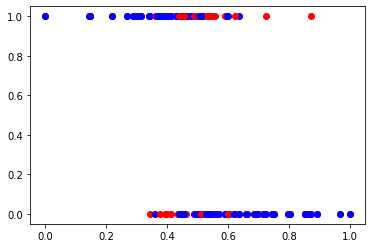

69.47368421052632


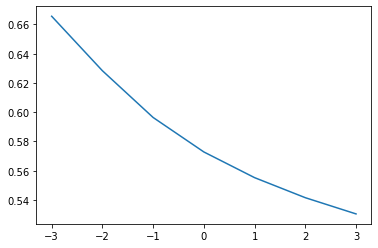

Accuracy and Errorrate of the testing data


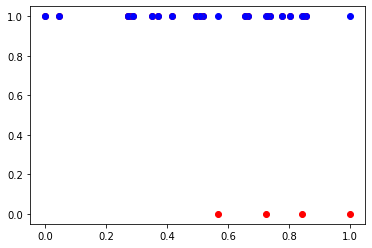

83.33333333333334


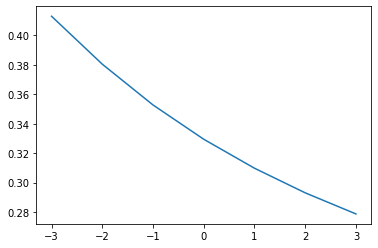

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


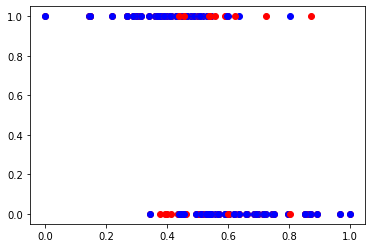

74.73684210526315


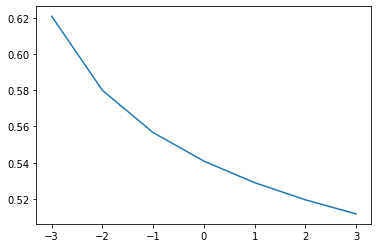

Accuracy and Errorrate of the testing data


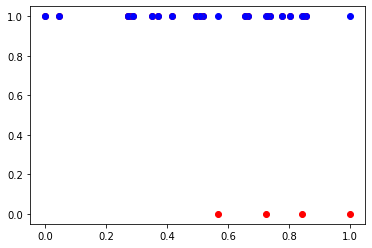

83.33333333333334


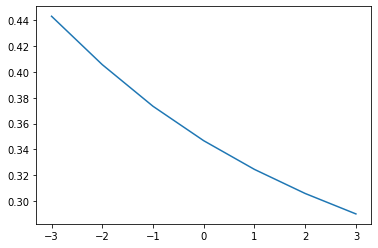

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


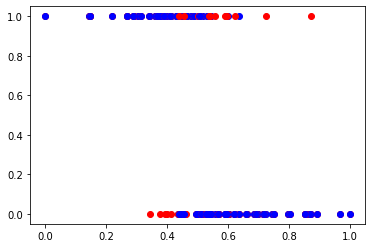

72.63157894736842


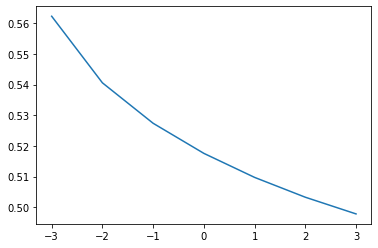

Accuracy and Errorrate of the testing data


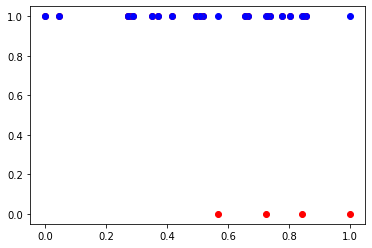

83.33333333333334


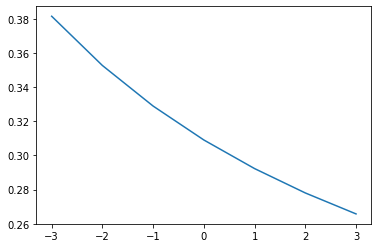

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


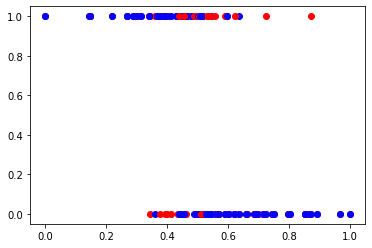

70.52631578947368


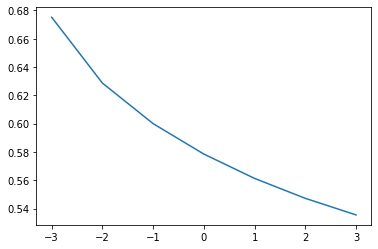

Accuracy and Errorrate of the testing data


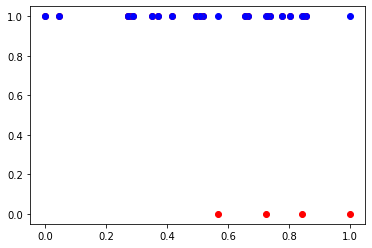

83.33333333333334


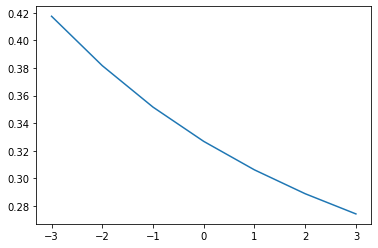

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


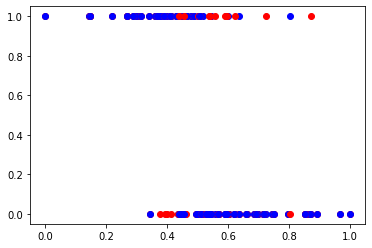

72.63157894736842


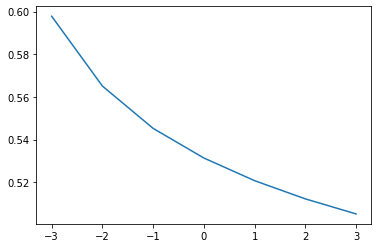

Accuracy and Errorrate of the testing data


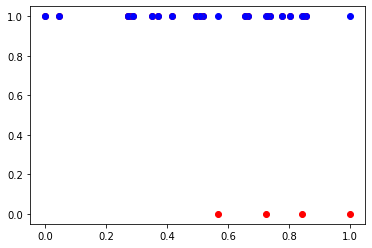

83.33333333333334


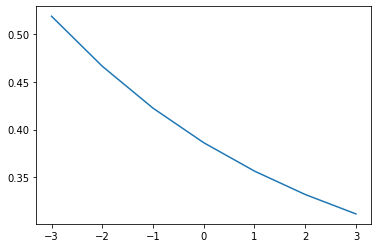

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


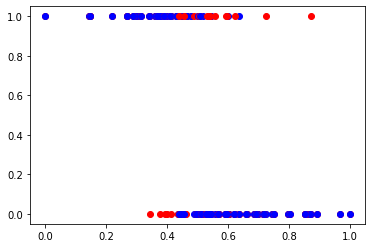

71.57894736842105


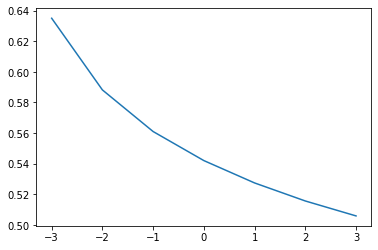

Accuracy and Errorrate of the testing data


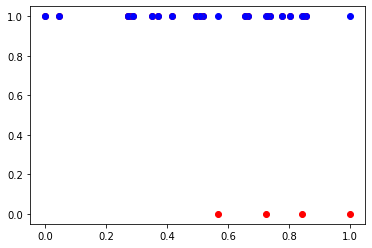

83.33333333333334


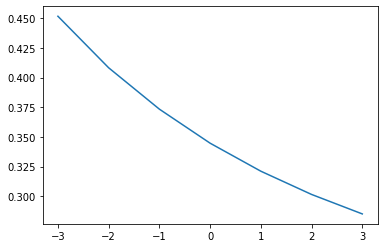

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


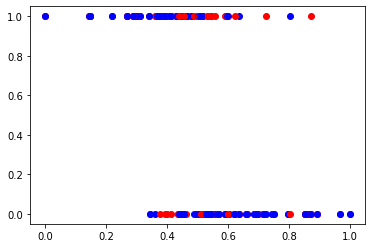

69.47368421052632


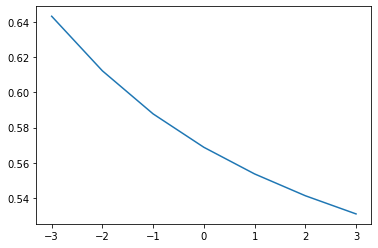

Accuracy and Errorrate of the testing data


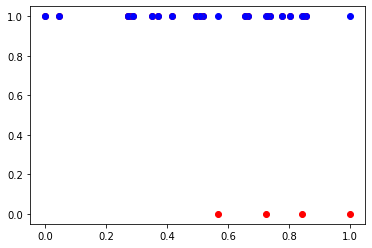

83.33333333333334


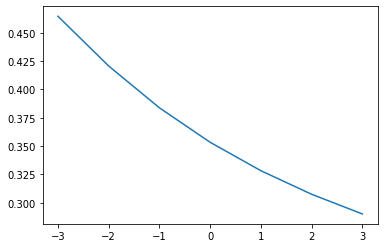

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


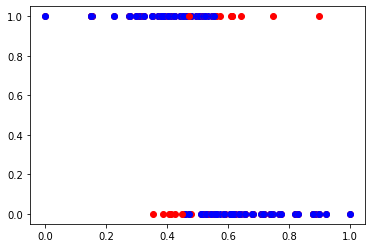

75.78947368421053


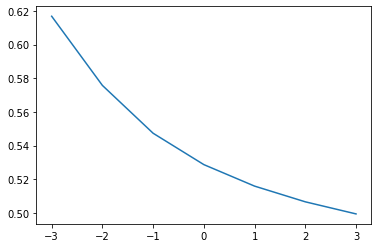

Accuracy and Errorrate of the testing data


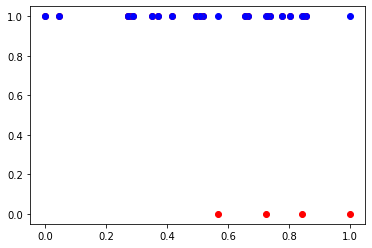

83.33333333333334


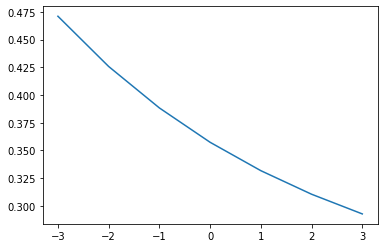

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


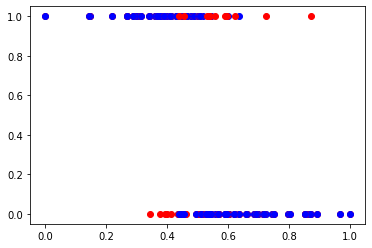

72.63157894736842


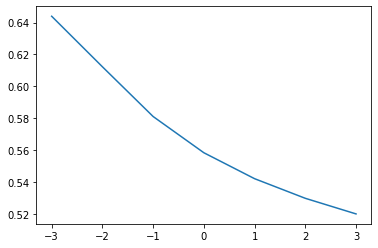

Accuracy and Errorrate of the testing data


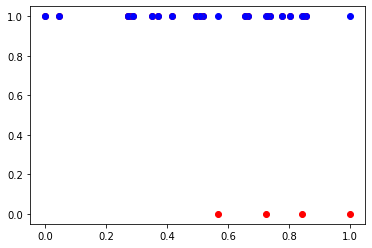

83.33333333333334


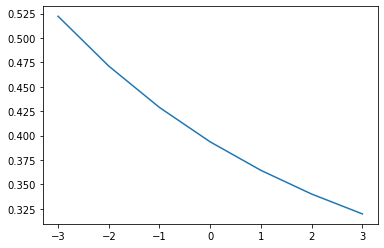

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


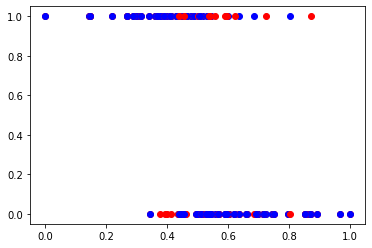

71.57894736842105


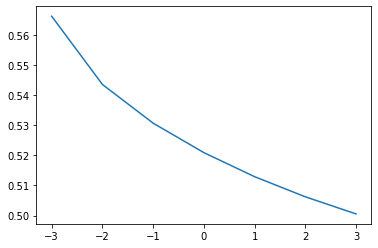

Accuracy and Errorrate of the testing data


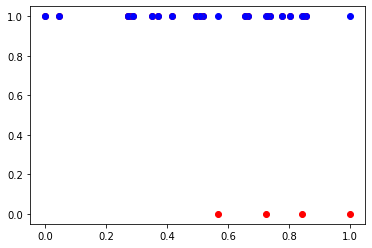

83.33333333333334


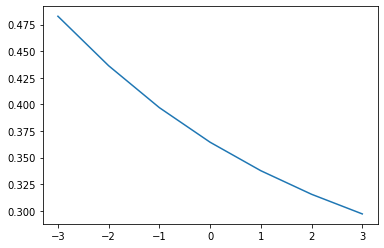

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


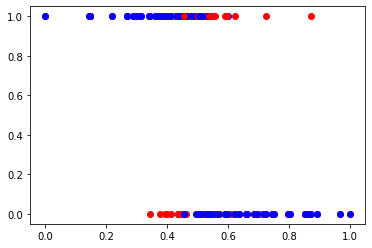

73.68421052631578


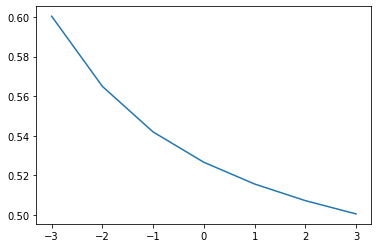

Accuracy and Errorrate of the testing data


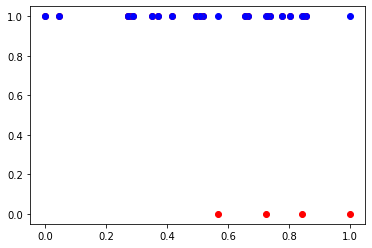

83.33333333333334


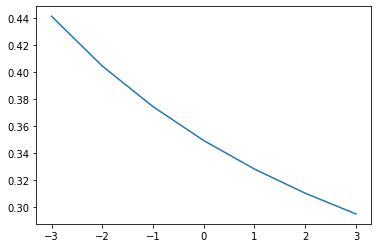

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


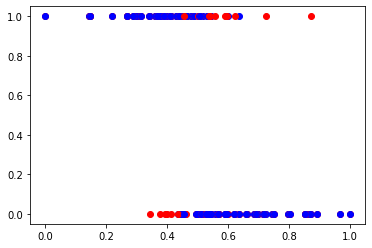

73.68421052631578


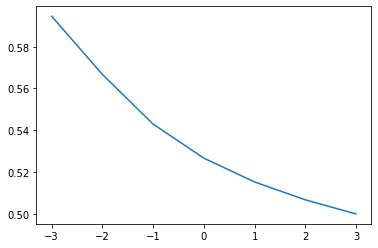

Accuracy and Errorrate of the testing data


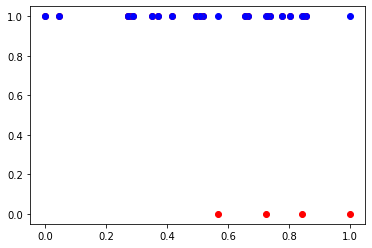

83.33333333333334


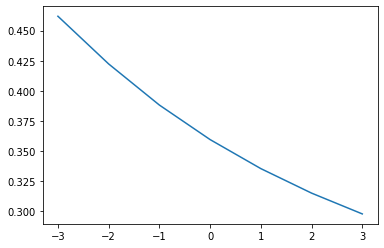

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


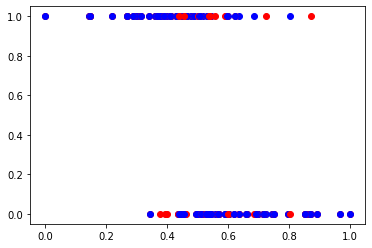

74.73684210526315


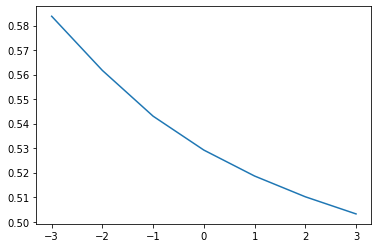

Accuracy and Errorrate of the testing data


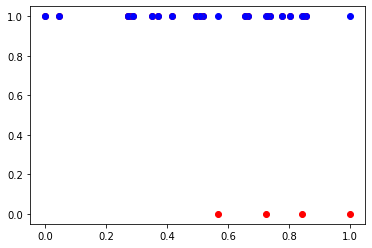

83.33333333333334


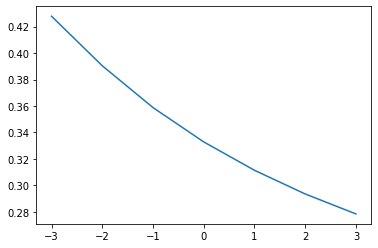

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


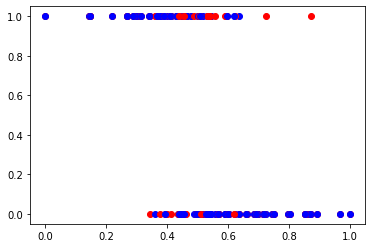

68.42105263157895


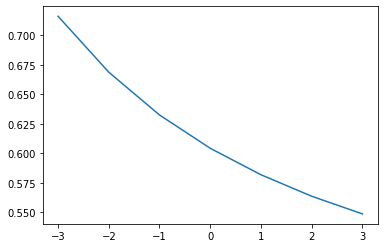

Accuracy and Errorrate of the testing data


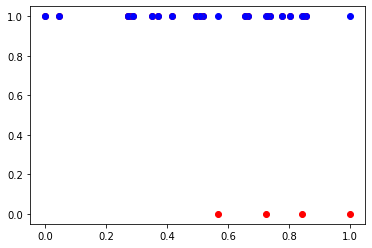

83.33333333333334


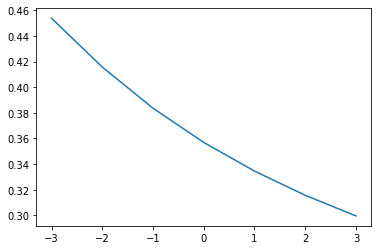

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


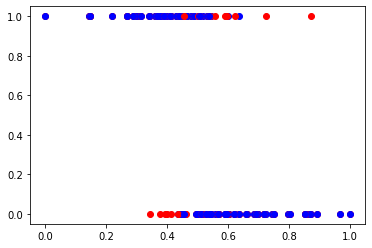

73.68421052631578


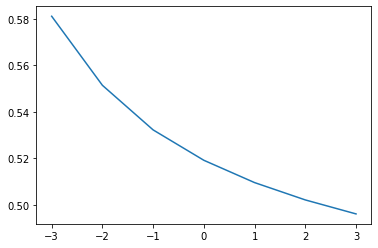

Accuracy and Errorrate of the testing data


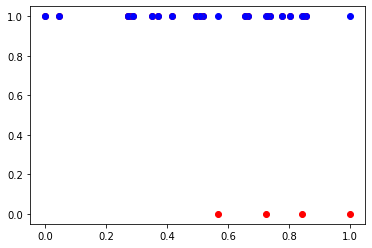

83.33333333333334


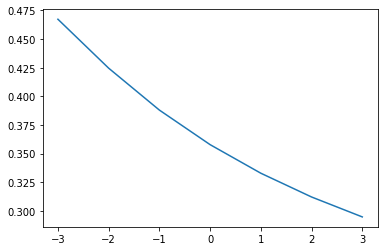

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


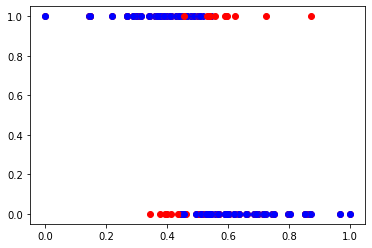

75.78947368421053


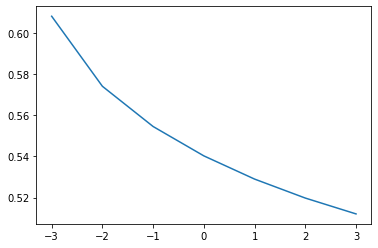

Accuracy and Errorrate of the testing data


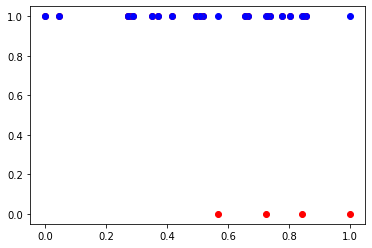

83.33333333333334


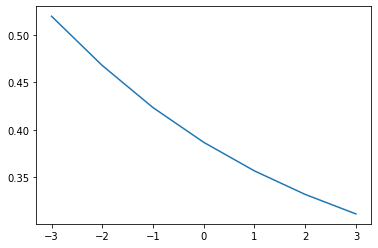

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


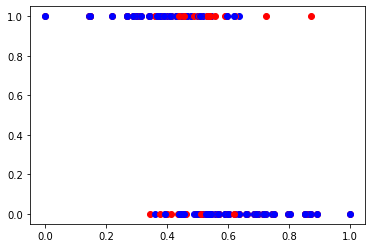

69.47368421052632


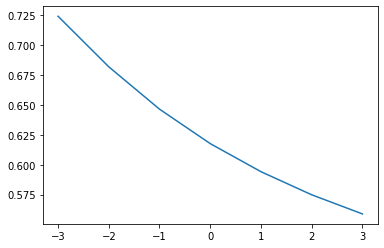

Accuracy and Errorrate of the testing data


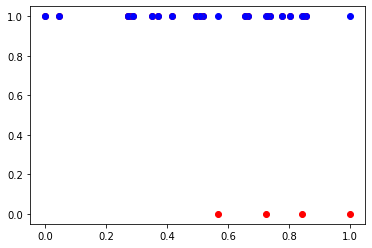

83.33333333333334


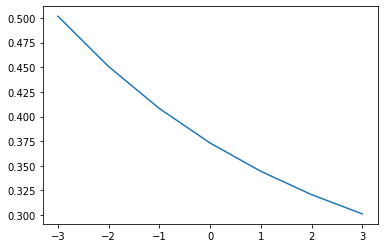

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


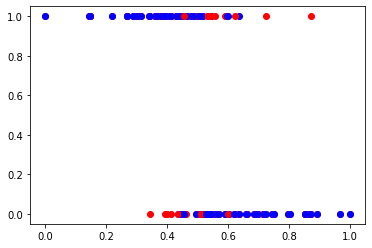

74.73684210526315


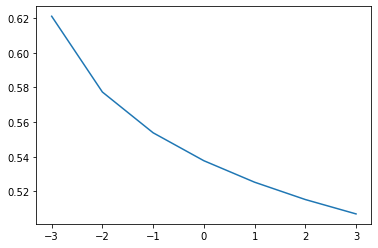

Accuracy and Errorrate of the testing data


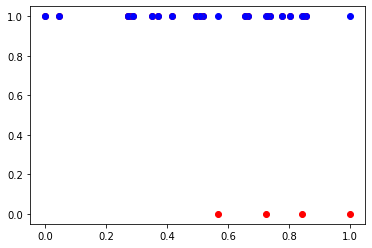

83.33333333333334


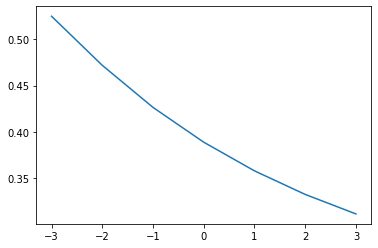

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


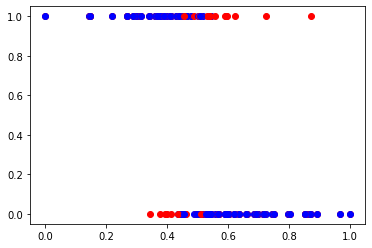

72.63157894736842


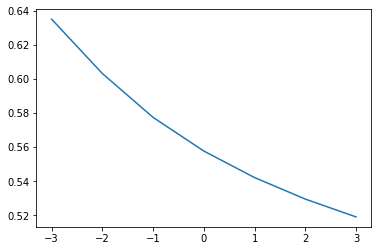

Accuracy and Errorrate of the testing data


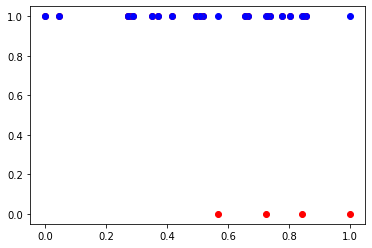

83.33333333333334


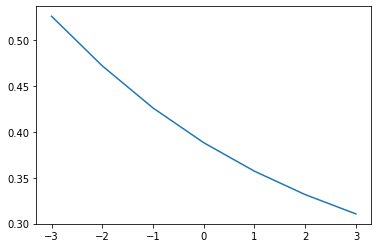

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


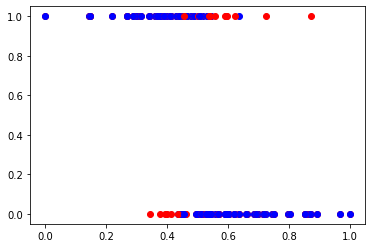

74.73684210526315


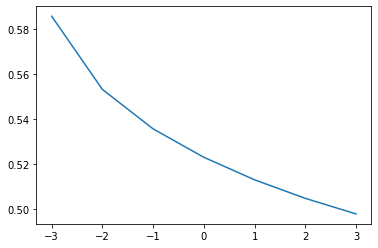

Accuracy and Errorrate of the testing data


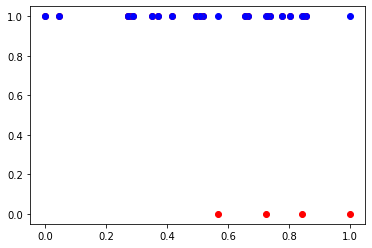

83.33333333333334


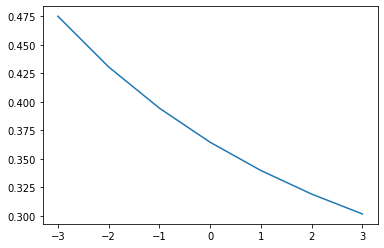

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


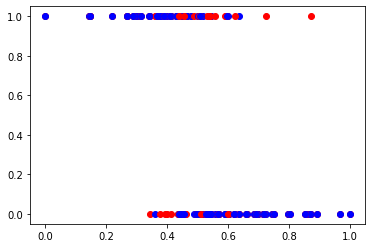

69.47368421052632


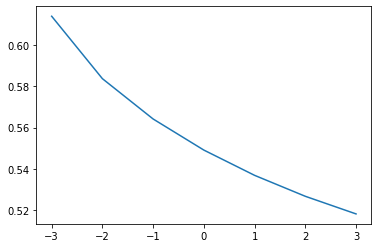

Accuracy and Errorrate of the testing data


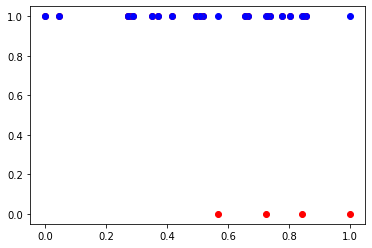

83.33333333333334


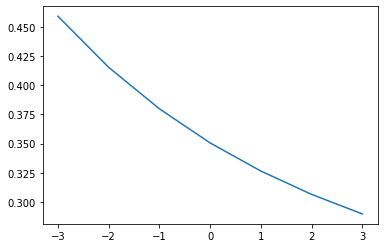

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


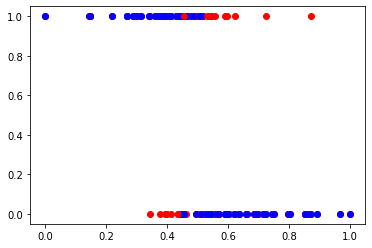

74.73684210526315


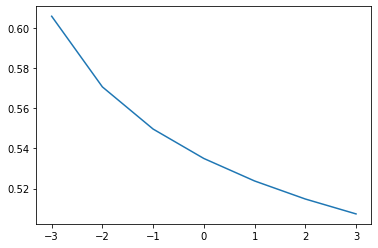

Accuracy and Errorrate of the testing data


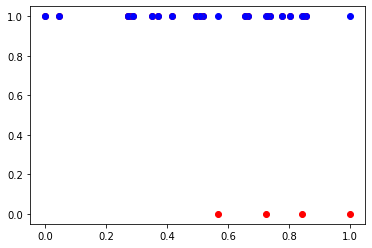

83.33333333333334


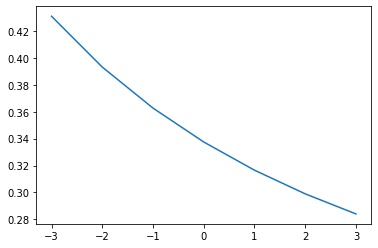

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


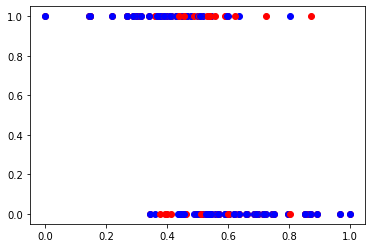

70.52631578947368


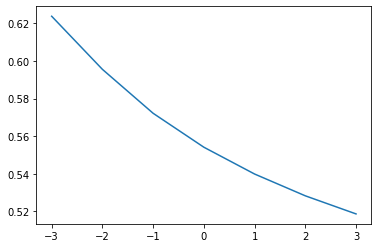

Accuracy and Errorrate of the testing data


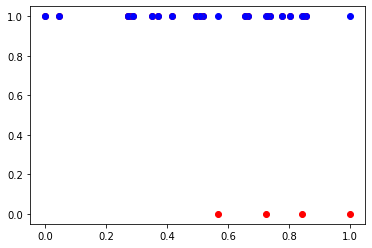

83.33333333333334


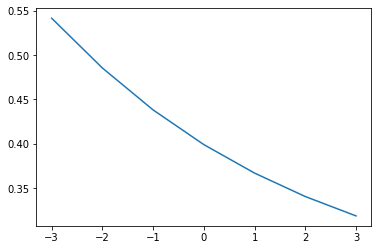

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


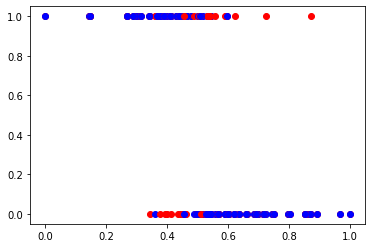

70.52631578947368


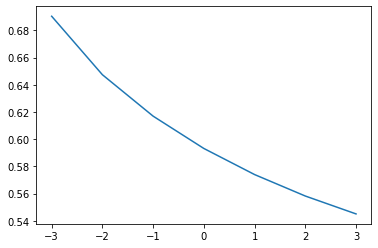

Accuracy and Errorrate of the testing data


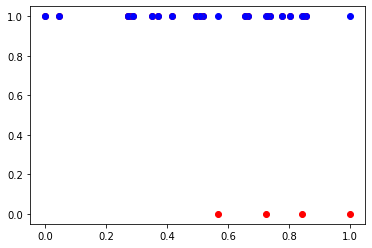

83.33333333333334


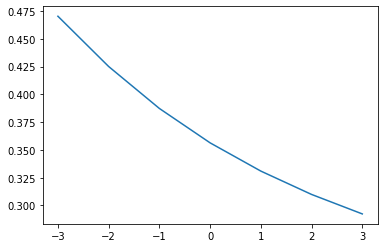

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


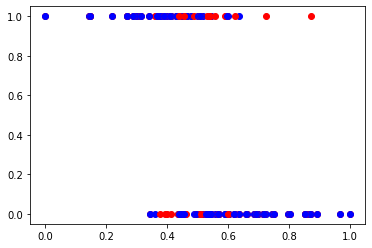

71.57894736842105


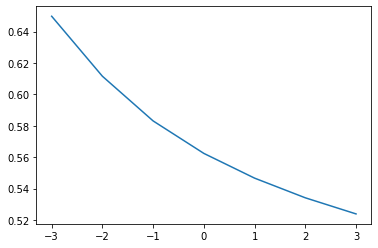

Accuracy and Errorrate of the testing data


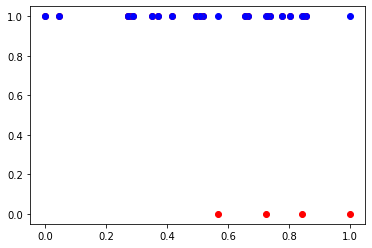

83.33333333333334


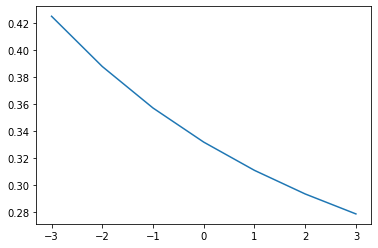

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


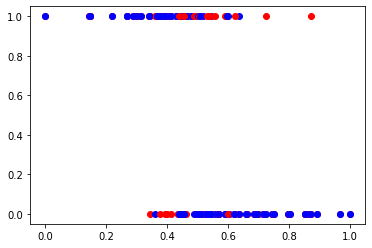

70.52631578947368


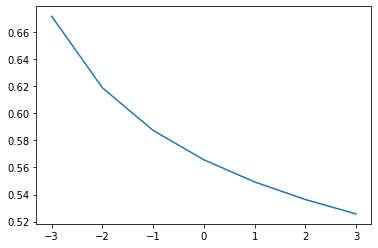

Accuracy and Errorrate of the testing data


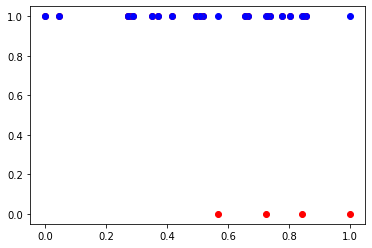

83.33333333333334


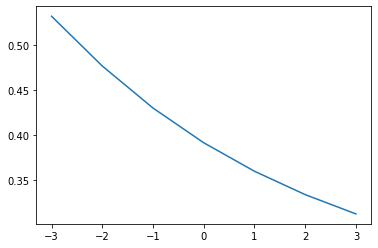

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


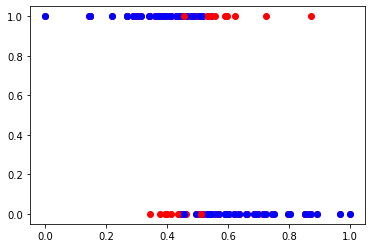

74.73684210526315


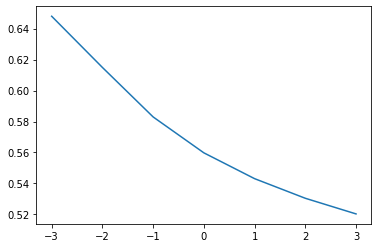

Accuracy and Errorrate of the testing data


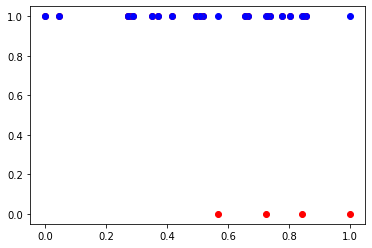

83.33333333333334


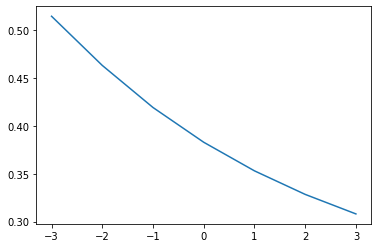

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


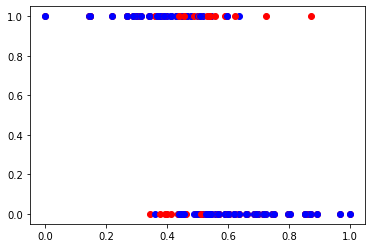

70.52631578947368


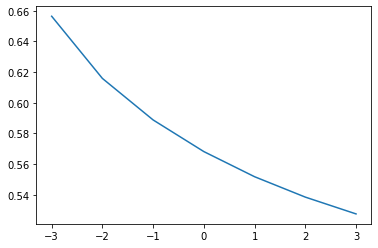

Accuracy and Errorrate of the testing data


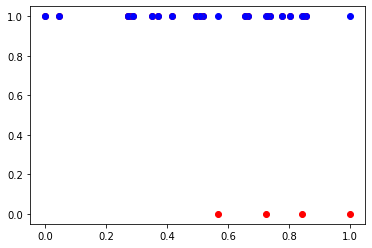

83.33333333333334


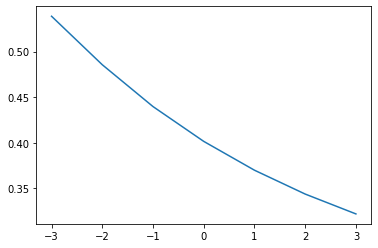

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


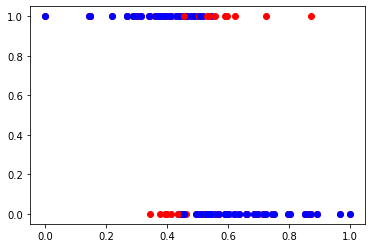

75.78947368421053


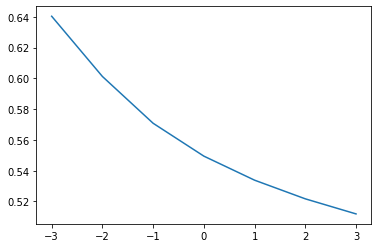

Accuracy and Errorrate of the testing data


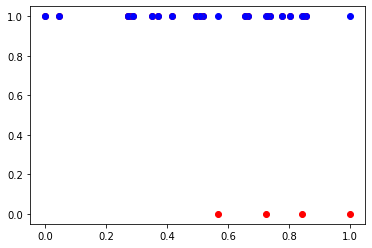

83.33333333333334


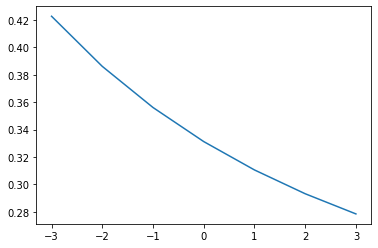

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


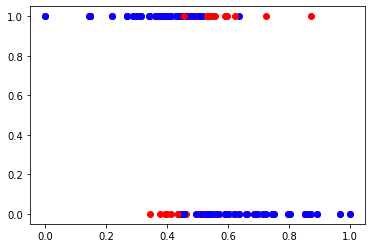

74.73684210526315


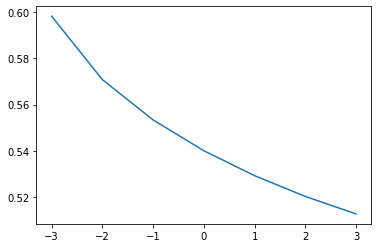

Accuracy and Errorrate of the testing data


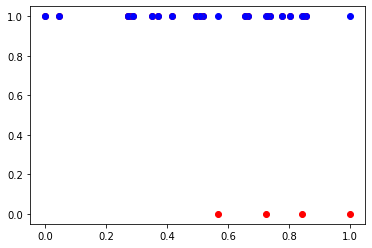

83.33333333333334


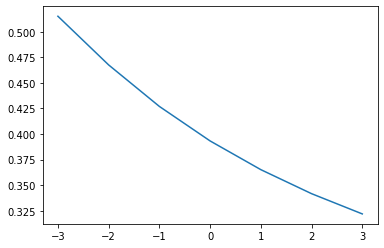

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


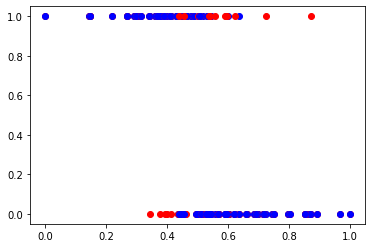

72.63157894736842


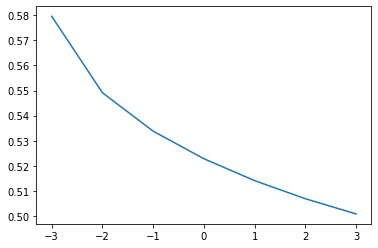

Accuracy and Errorrate of the testing data


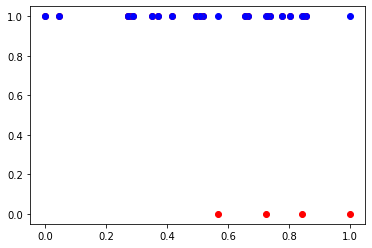

83.33333333333334


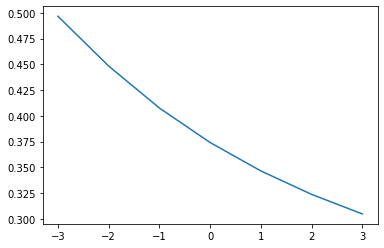

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


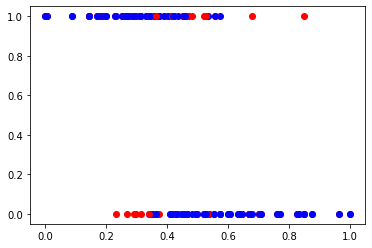

75.78947368421053


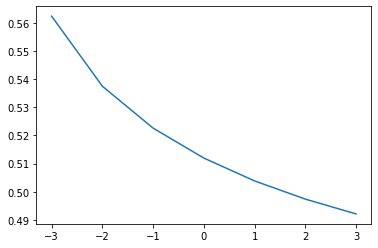

Accuracy and Errorrate of the testing data


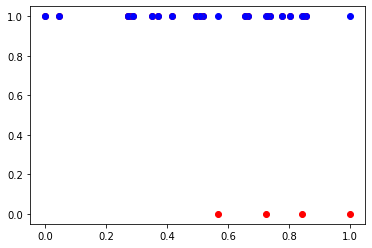

83.33333333333334


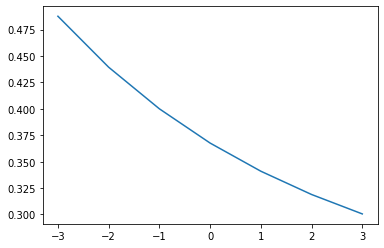

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


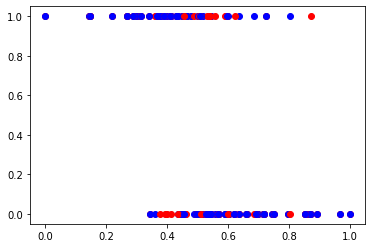

70.52631578947368


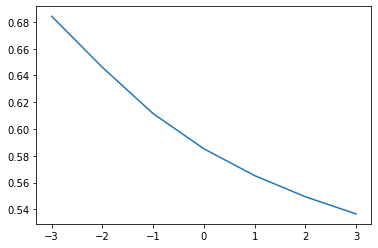

Accuracy and Errorrate of the testing data


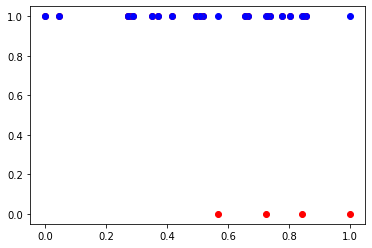

83.33333333333334


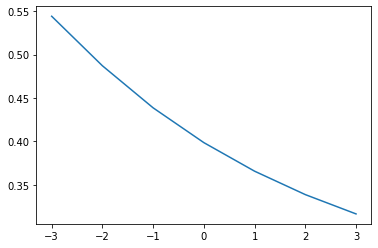

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


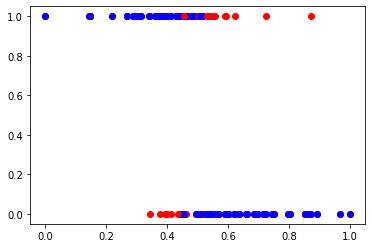

75.78947368421053


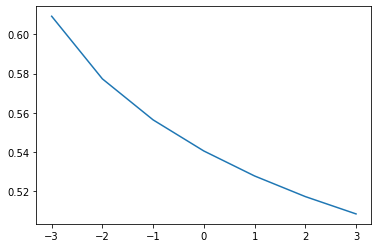

Accuracy and Errorrate of the testing data


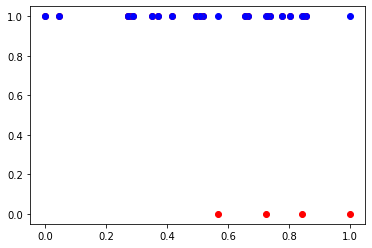

83.33333333333334


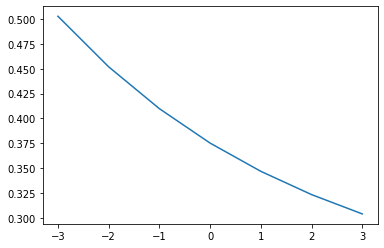

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


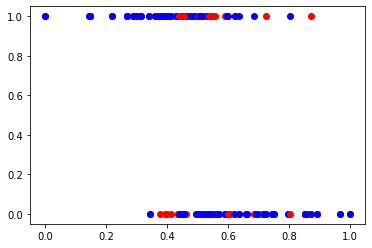

73.68421052631578


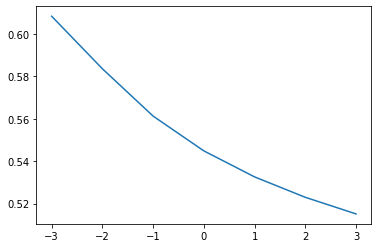

Accuracy and Errorrate of the testing data


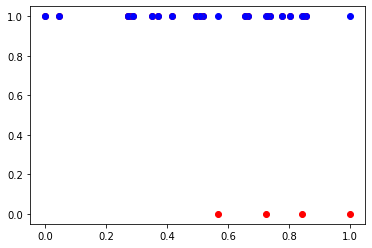

83.33333333333334


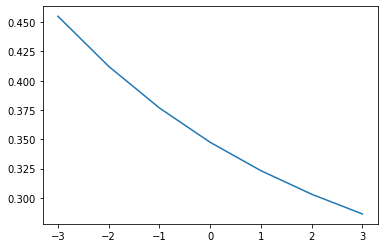

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


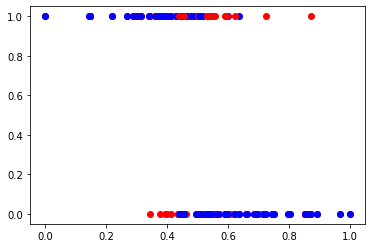

71.57894736842105


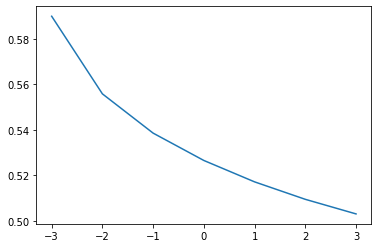

Accuracy and Errorrate of the testing data


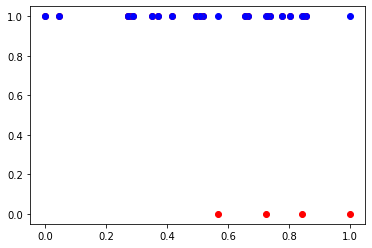

83.33333333333334


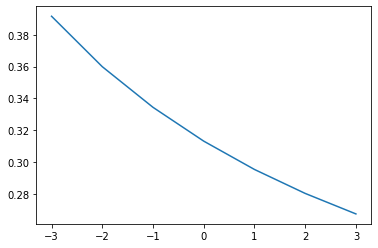

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


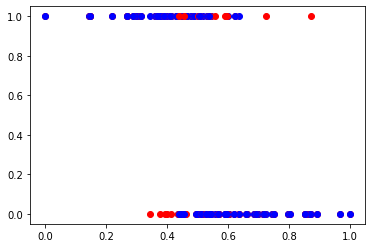

74.73684210526315


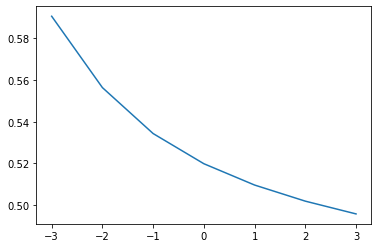

Accuracy and Errorrate of the testing data


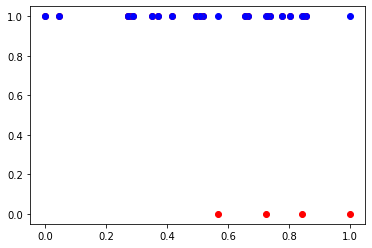

83.33333333333334


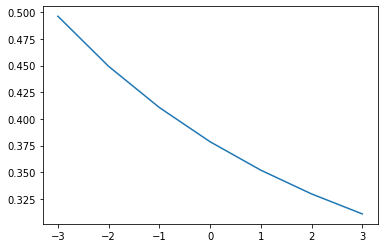

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


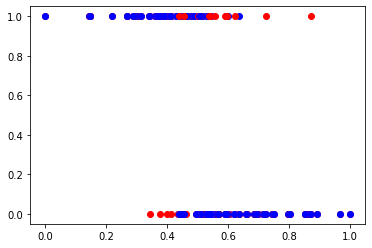

73.68421052631578


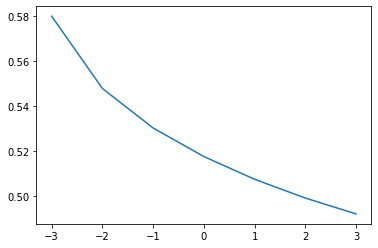

Accuracy and Errorrate of the testing data


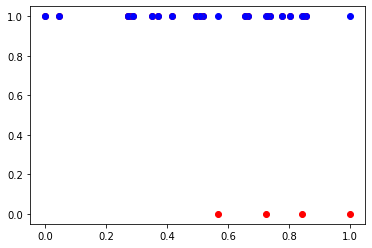

83.33333333333334


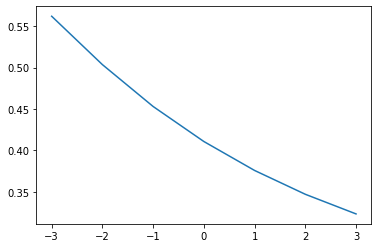

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


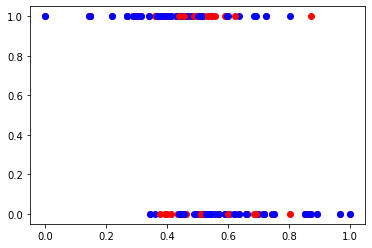

69.47368421052632


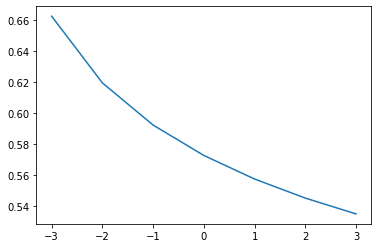

Accuracy and Errorrate of the testing data


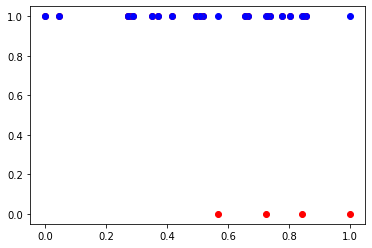

83.33333333333334


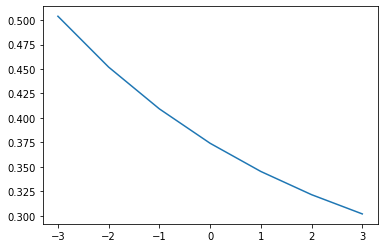

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


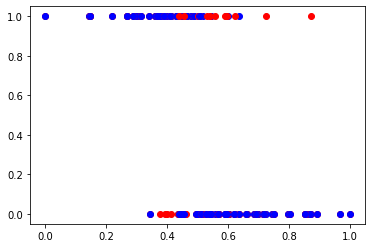

73.68421052631578


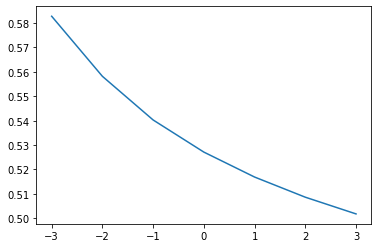

Accuracy and Errorrate of the testing data


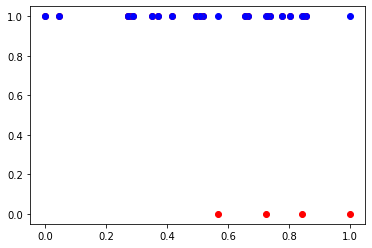

83.33333333333334


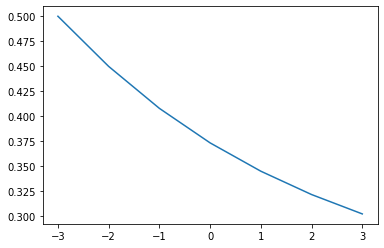

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


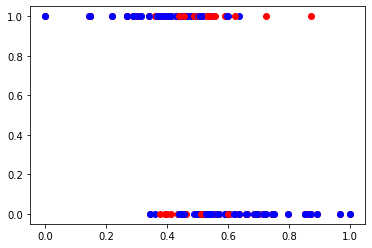

70.52631578947368


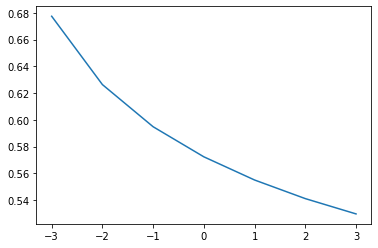

Accuracy and Errorrate of the testing data


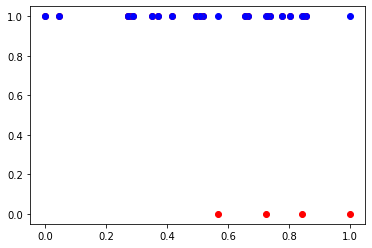

83.33333333333334


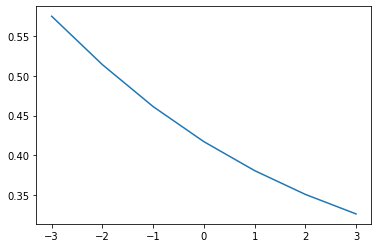

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


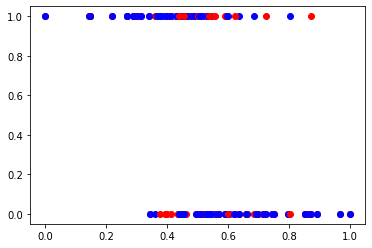

71.57894736842105


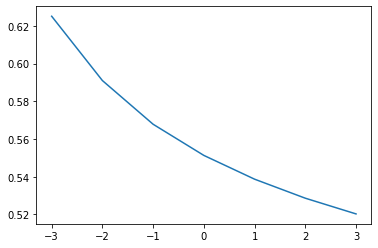

Accuracy and Errorrate of the testing data


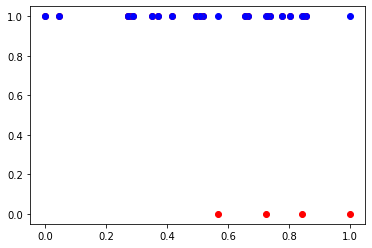

83.33333333333334


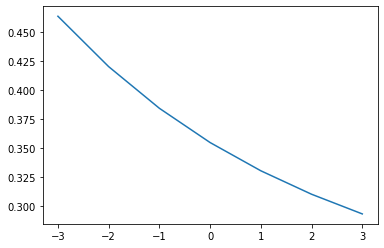

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


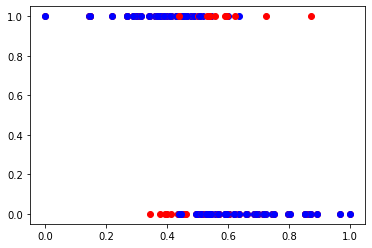

72.63157894736842


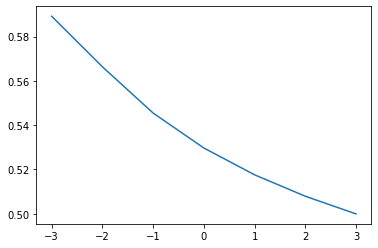

Accuracy and Errorrate of the testing data


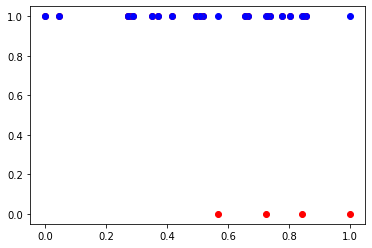

83.33333333333334


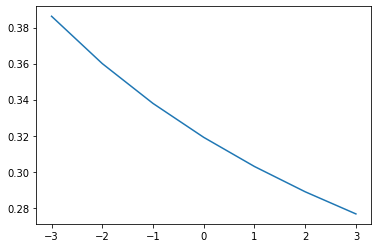

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


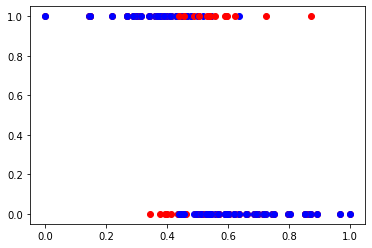

71.57894736842105


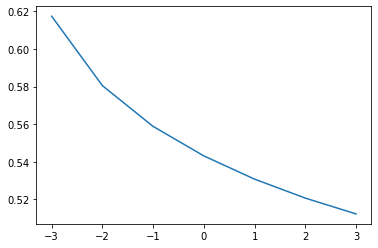

Accuracy and Errorrate of the testing data


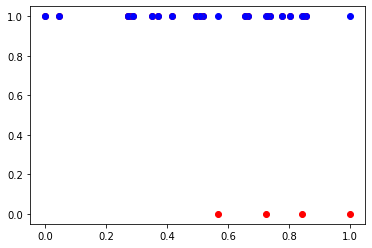

83.33333333333334


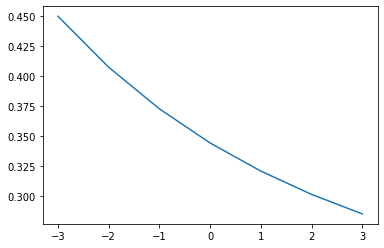

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


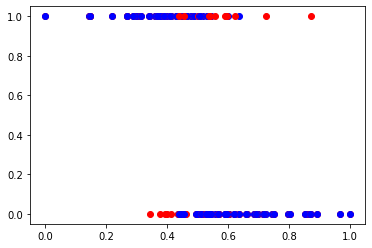

72.63157894736842


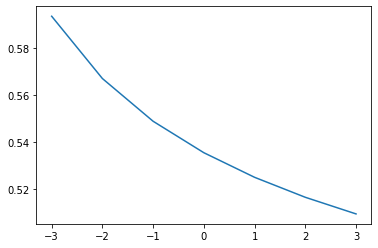

Accuracy and Errorrate of the testing data


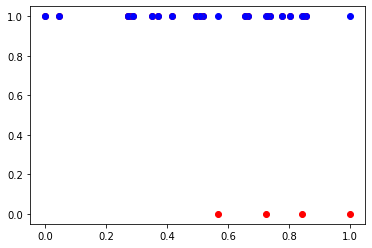

83.33333333333334


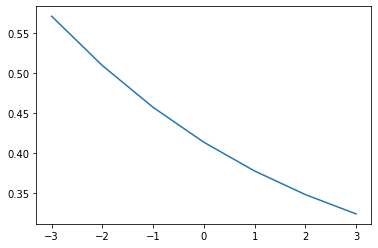

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


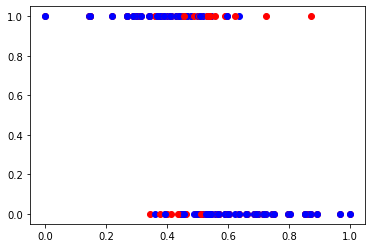

71.57894736842105


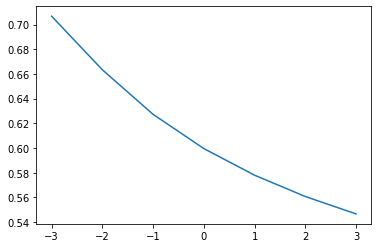

Accuracy and Errorrate of the testing data


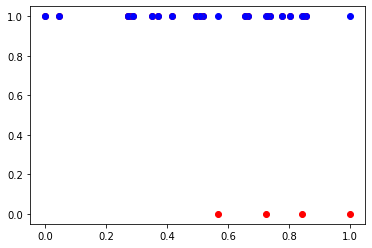

83.33333333333334


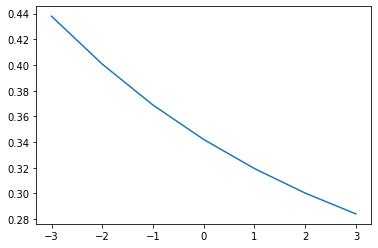

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


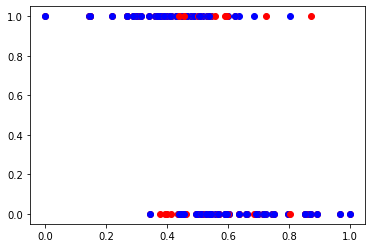

73.68421052631578


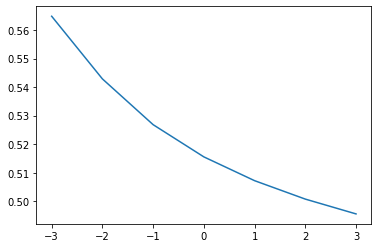

Accuracy and Errorrate of the testing data


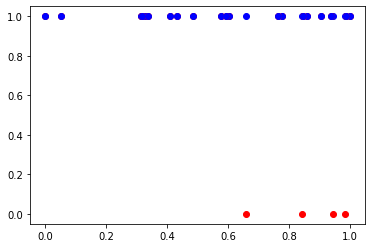

83.33333333333334


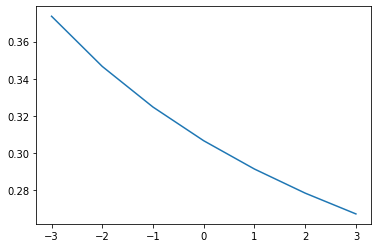

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


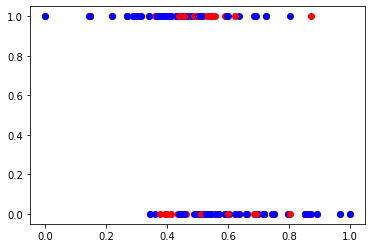

68.42105263157895


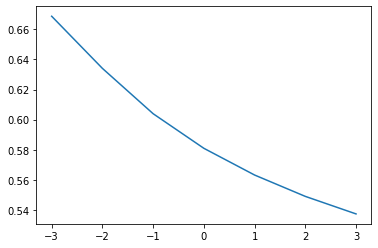

Accuracy and Errorrate of the testing data


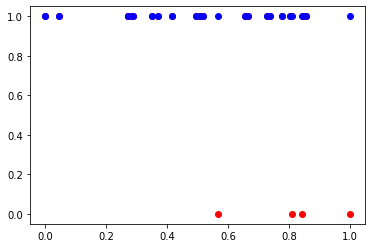

83.33333333333334


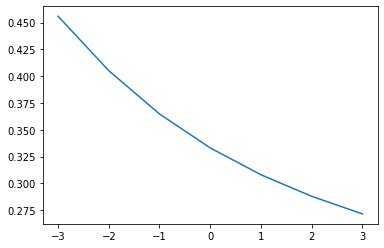

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


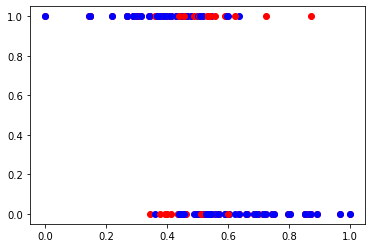

69.47368421052632


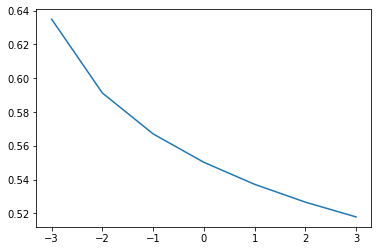

Accuracy and Errorrate of the testing data


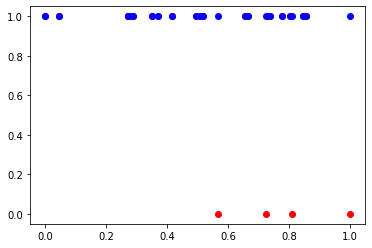

83.33333333333334


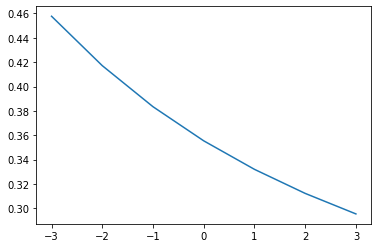

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


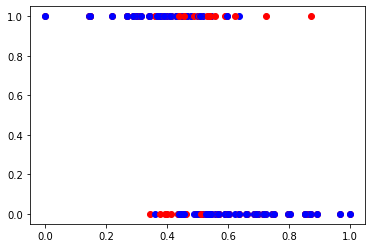

70.52631578947368


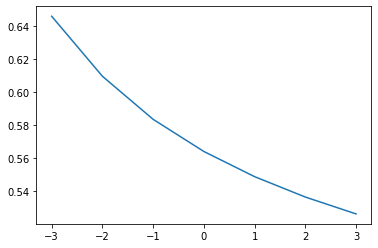

Accuracy and Errorrate of the testing data


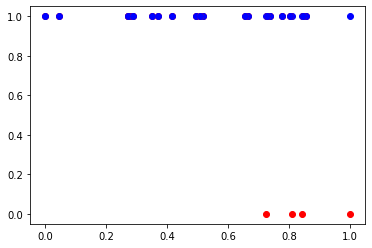

83.33333333333334


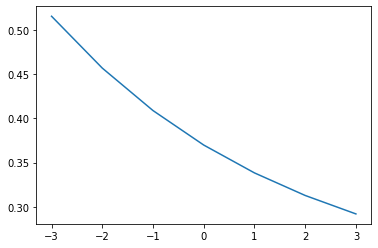

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


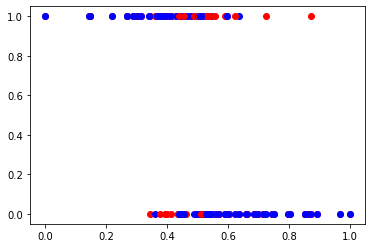

69.47368421052632


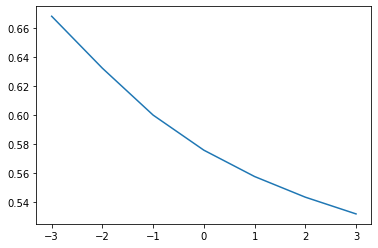

Accuracy and Errorrate of the testing data


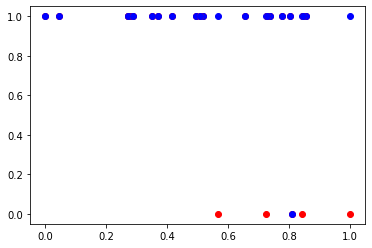

83.33333333333334


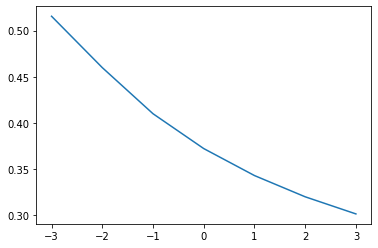

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


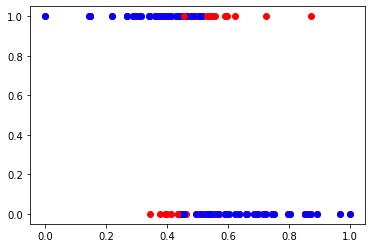

75.78947368421053


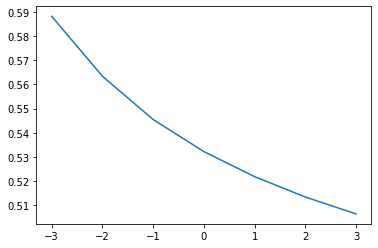

Accuracy and Errorrate of the testing data


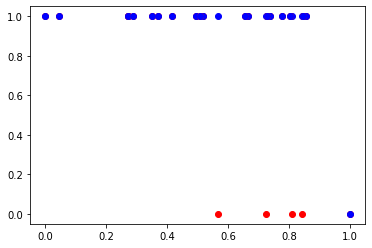

83.33333333333334


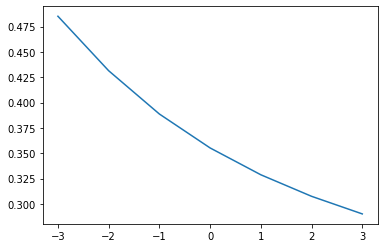

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


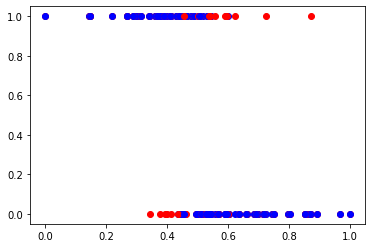

73.68421052631578


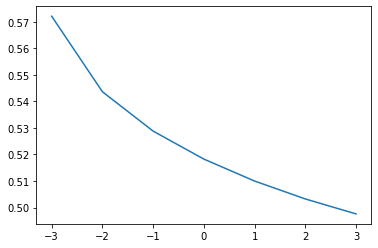

Accuracy and Errorrate of the testing data


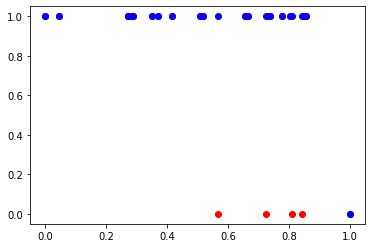

83.33333333333334


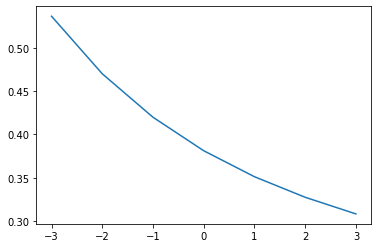

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


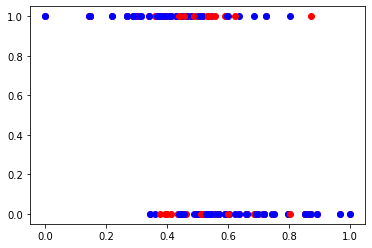

69.47368421052632


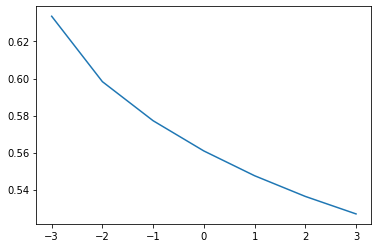

Accuracy and Errorrate of the testing data


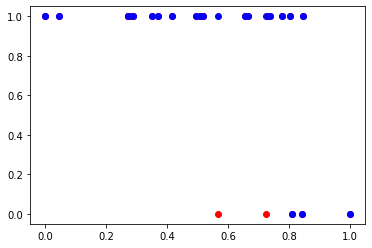

91.66666666666666


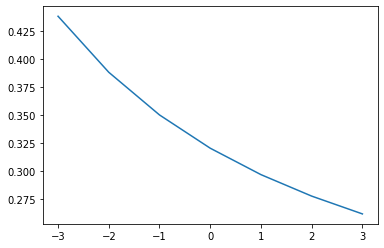

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


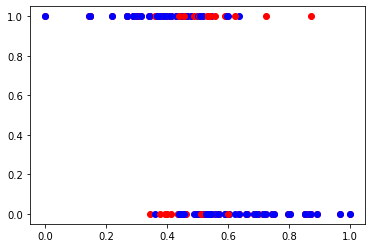

69.47368421052632


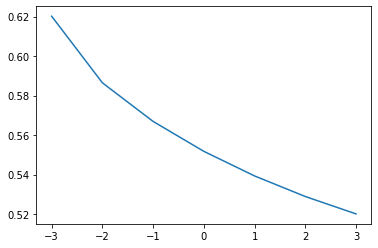

Accuracy and Errorrate of the testing data


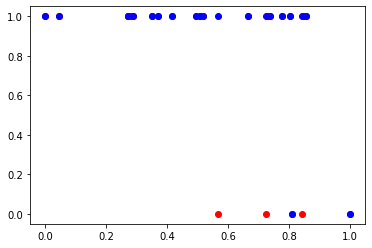

87.5


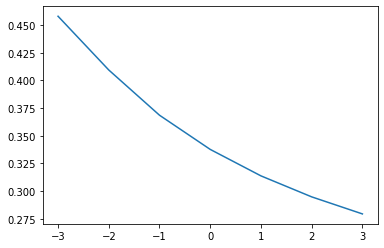

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


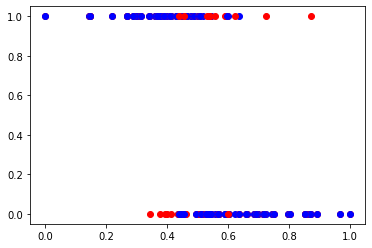

73.68421052631578


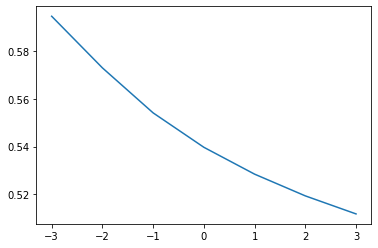

Accuracy and Errorrate of the testing data


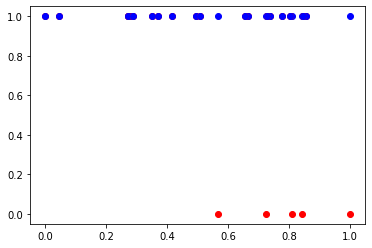

79.16666666666666


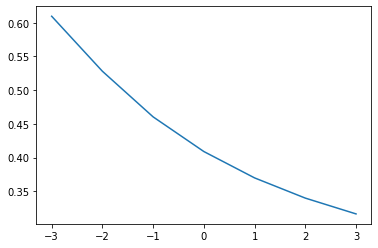

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


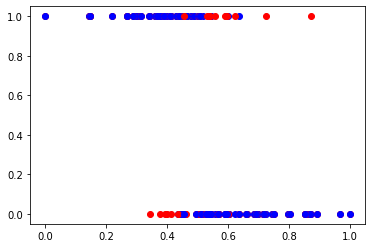

73.68421052631578


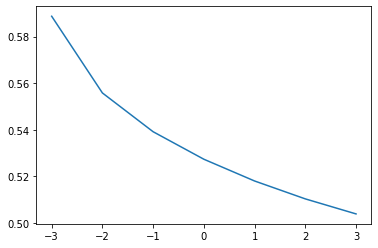

Accuracy and Errorrate of the testing data


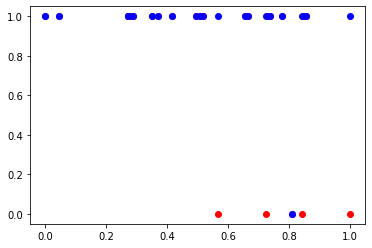

83.33333333333334


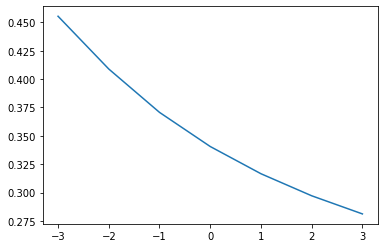

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


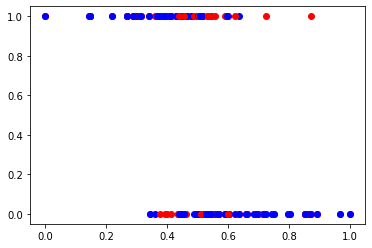

70.52631578947368


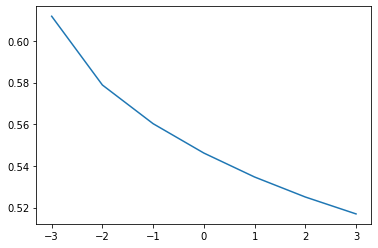

Accuracy and Errorrate of the testing data


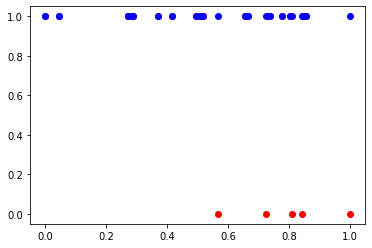

79.16666666666666


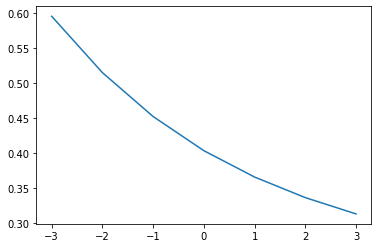

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


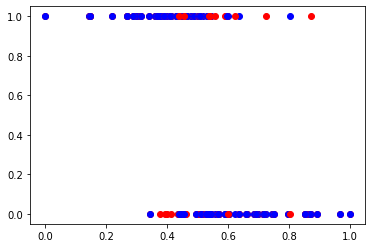

74.73684210526315


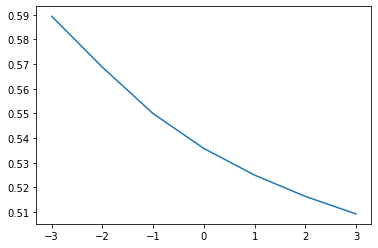

Accuracy and Errorrate of the testing data


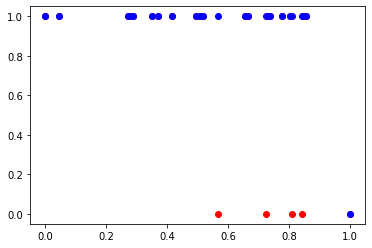

83.33333333333334


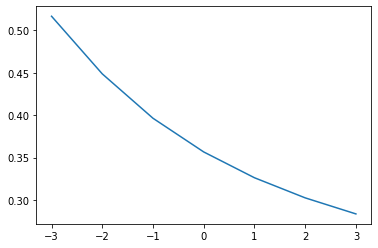

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


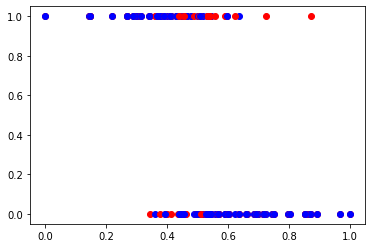

70.52631578947368


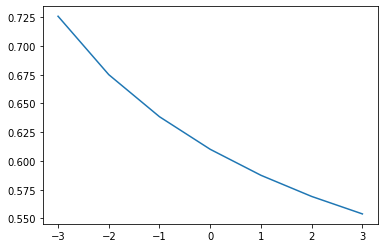

Accuracy and Errorrate of the testing data


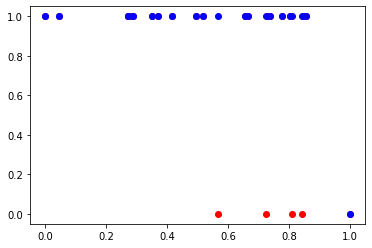

83.33333333333334


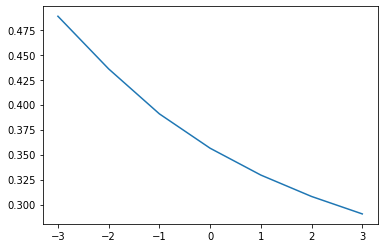

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


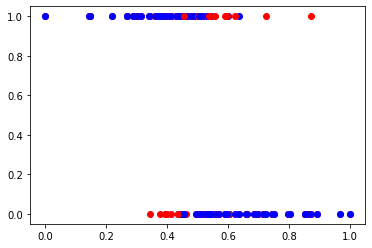

73.68421052631578


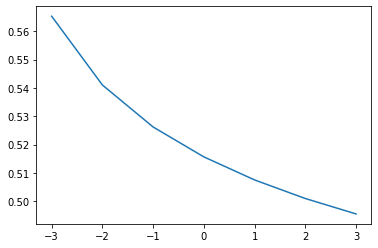

Accuracy and Errorrate of the testing data


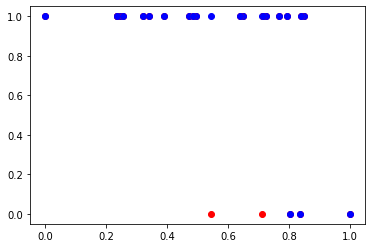

91.66666666666666


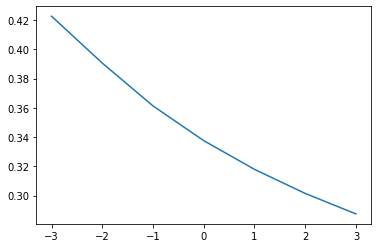

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


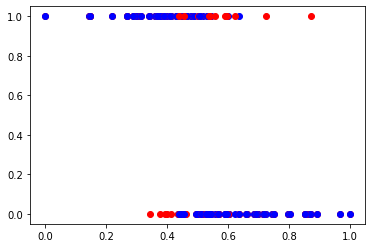

72.63157894736842


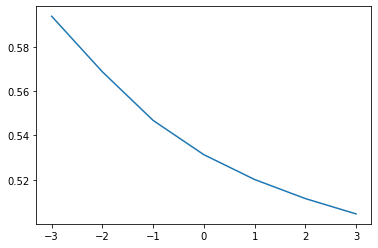

Accuracy and Errorrate of the testing data


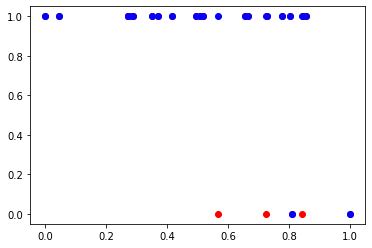

87.5


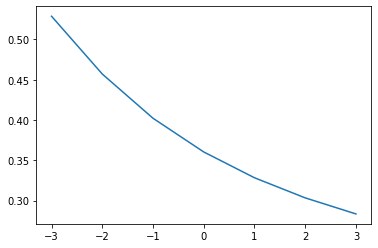

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


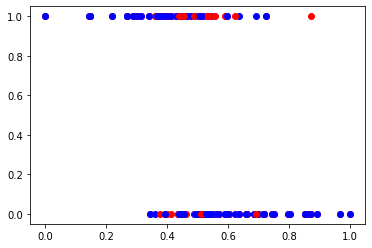

70.52631578947368


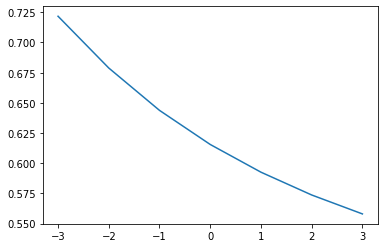

Accuracy and Errorrate of the testing data


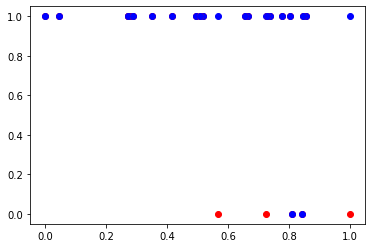

87.5


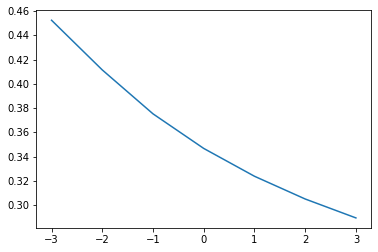

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


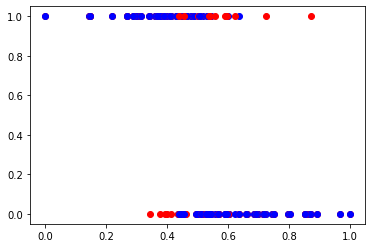

72.63157894736842


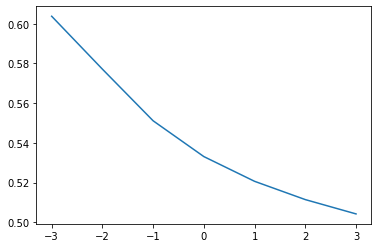

Accuracy and Errorrate of the testing data


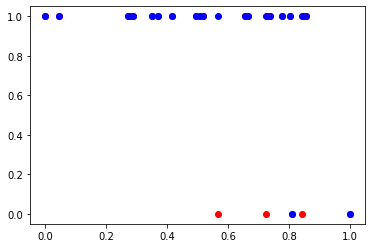

87.5


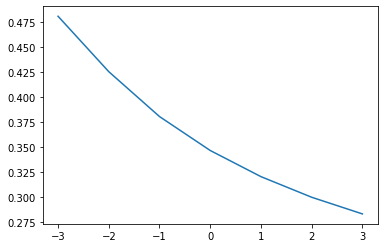

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


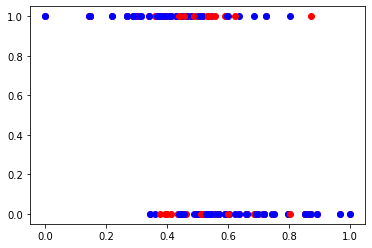

69.47368421052632


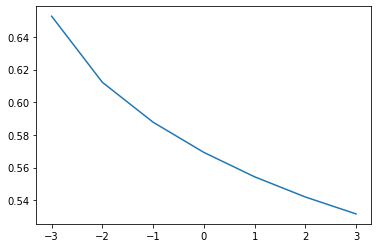

Accuracy and Errorrate of the testing data


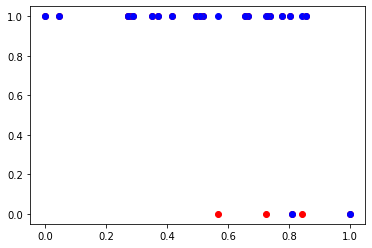

87.5


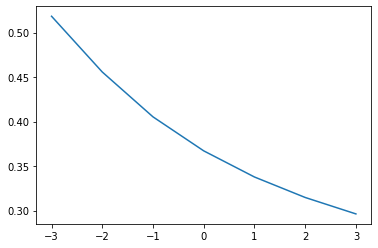

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


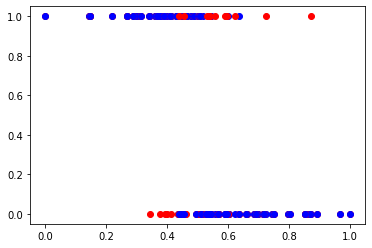

72.63157894736842


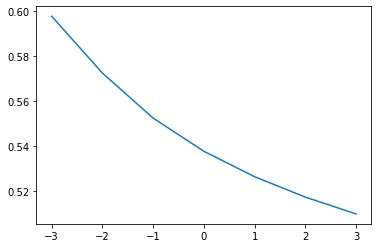

Accuracy and Errorrate of the testing data


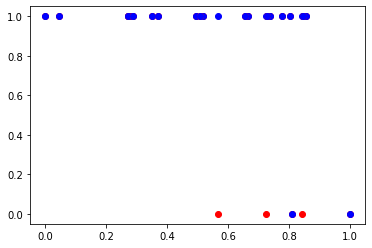

87.5


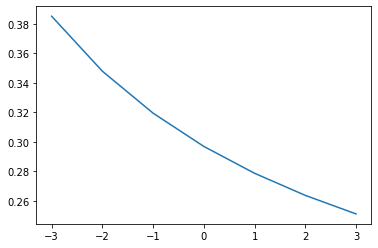

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


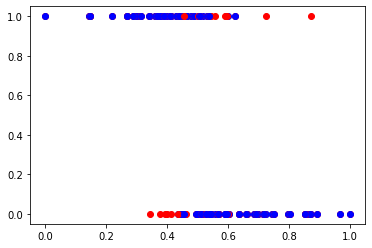

74.73684210526315


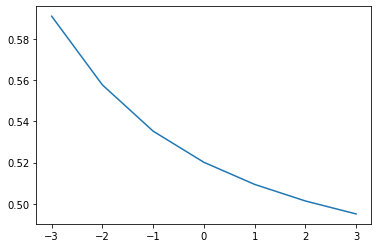

Accuracy and Errorrate of the testing data


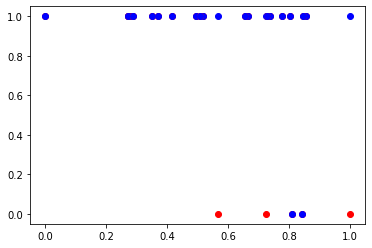

87.5


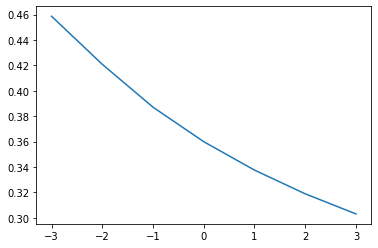

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


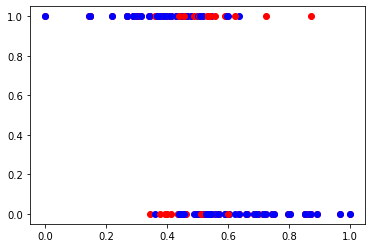

69.47368421052632


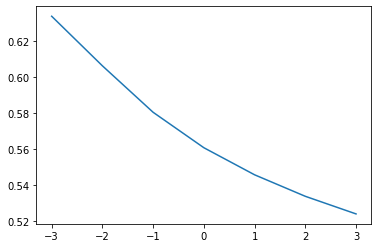

Accuracy and Errorrate of the testing data


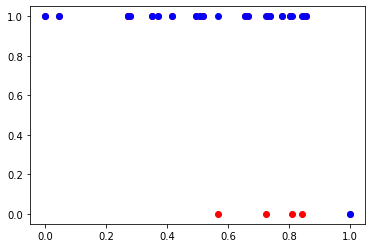

83.33333333333334


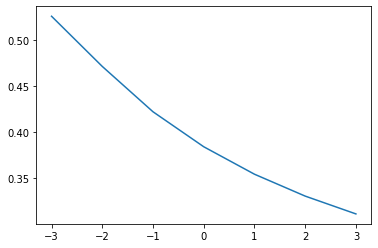

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


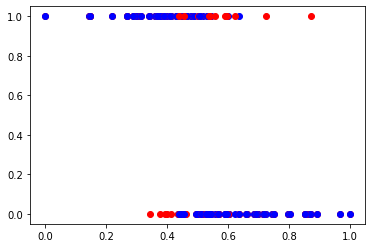

72.63157894736842


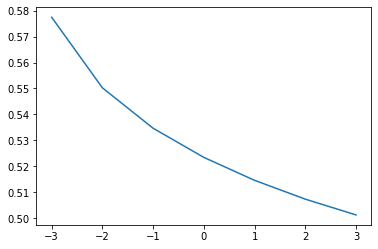

Accuracy and Errorrate of the testing data


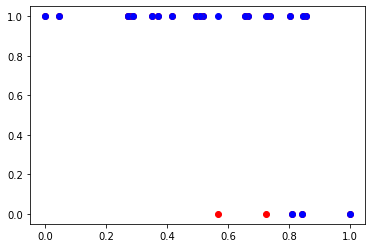

91.66666666666666


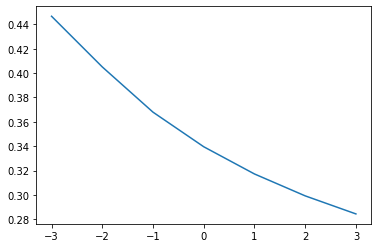

     Height     Weight  Age  Gender
0  1.731660  73.919682   25       0
1  1.540756  78.686701   24       1
2  1.665596  88.076350   25       0
3  1.755879  77.141752   22       1
4  1.744801  85.143587   24       0
119
95
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Height    float64
Weight    float64
Age         int64
dtype: object
int64
Accuracy and Errorrate of the training data


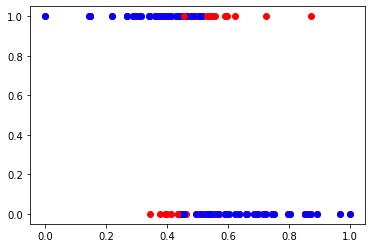

75.78947368421053


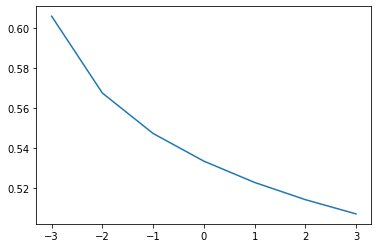

Accuracy and Errorrate of the testing data


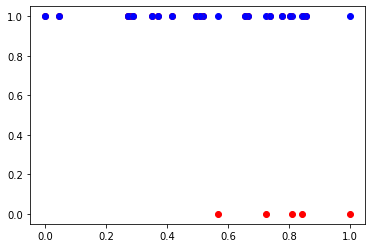

79.16666666666666


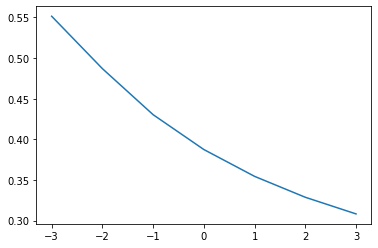

In [496]:
#Leave one out data 
for i in range(gender_data.shape[0]):
  leave_out_data=gender_data.drop(axis=0, index=i)
  preprocessing(leave_out_data)

In [497]:
Age_remove_data=gender_data.drop(['Age'], axis=1)
Age_remove_data

Height     Weight  Gender
0    1.731660  73.919682       0
1    1.540756  78.686701       1
2    1.665596  88.076350       0
3    1.755879  77.141752       1
4    1.744801  85.143587       0
..        ...        ...     ...
115  1.725171  74.743218       1
116  1.605187  66.419529       1
117  1.505039  71.872826       1
118  1.552111  82.811815       1
119  1.565286  81.689345       1

[120 rows x 3 columns]

     Height     Weight  Gender
0  1.731660  73.919682       0
1  1.540756  78.686701       1
2  1.665596  88.076350       0
3  1.755879  77.141752       1
4  1.744801  85.143587       0
120
96
Height    float64
Weight    float64
dtype: object
int64
Height    float64
Weight    float64
dtype: object
int64
Accuracy and Errorrate of the training data


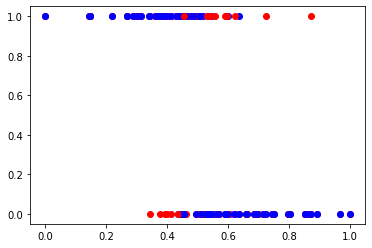

73.95833333333334


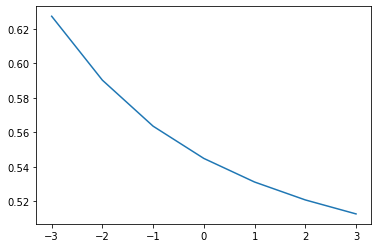

Accuracy and Errorrate of the testing data


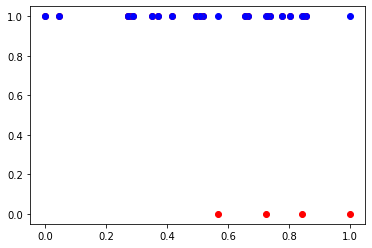

83.33333333333334


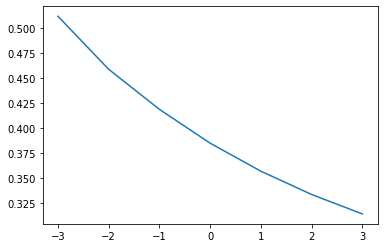

In [498]:
preprocessing(Age_remove_data)